# Visual journey through world development 1985-2014

This notebook combines data from the 5 datasets [World Bank Data (1960 to 2016)](https://www.kaggle.com/gemartin/world-bank-data-1960-to-2016), [Health Nutrition and Population Statistics](https://www.kaggle.com/theworldbank/health-nutrition-and-population-statistics), [Obesity among adults by country, 1975-2016](https://www.kaggle.com/amanarora/obesity-among-adults-by-country-19752016), [Suicide Rates Overview 1985 to 2016 ](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016) & [Pisa Scores](https://www.kaggle.com/zazueta/pisa-scores-2015), with the aim of analyzing world development in different fields mainly through visualizations. The kernel is structured on several data visualizations followed by an observations section, with different remarks organized in bullets and a brief summary marked in bold. 

This project is relatively extensive, so please make use of its structure depending on your interests; by just reviewing the charts, reading the main brief conclusions or digging into the more detailed explanations. 
Either if you are looking for some extensive information about world indicators or if you are more interested into the visualizations and EDA part, I hope you enjoy this work and find some relevant content.


![Earth](https://marisundvoll.weebly.com/uploads/4/5/5/2/45527563/8995703_orig.jpg)

**TABLE OF CONTENTS**

1. [Dataset preparation](#section1)

2. [General indicators](#section2)

3. [Education](#section3)

4. [Health & nutrition](#section4) 

5. [Mortality](#section5)

6. [Suicides](#section6)(under construction)



**Disclaimer**: By no means I'm an expert in sociology, medicine, politics or economics, and many remarks and observations you will find in this kernel could be strongly influenced by my personal opinion and background. Consider the observations section for each graph as a personal point of view of the author, despite I've tried to be as objective as possible. Feel free to drop any comment or discussion in the comments section and I'll be happy to join the debate in there.

In [ ]:
pip install https://github.com/Phlya/adjustText/archive/master.zip

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import time
import gc
from textwrap import wrap

plt.style.use('seaborn-pastel')
from adjustText import adjust_text
from IPython.core.display import HTML
import matplotlib.animation as animation
from matplotlib import rc
from matplotlib import cm
from matplotlib.ticker import MaxNLocator

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# 1. Dataset preparation <a id="section1"></a>

In order to work with the 5 datasets, we first need to transform them into a unified format and join them. Our objective is to obtain a final dataset structureded in country-year pairs with one column for each indicator, as shown below:

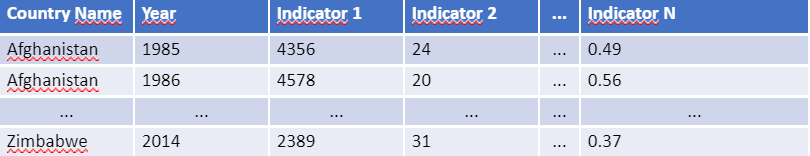

Load all files from the datasets and show their structure:

In [ ]:
country_pop = pd.read_csv('/kaggle/input/world-bank-data-1960-to-2016/country_population.csv')
life_expect = pd.read_csv('/kaggle/input/world-bank-data-1960-to-2016/life_expectancy.csv')
fertility_rate = pd.read_csv('/kaggle/input/world-bank-data-1960-to-2016/fertility_rate.csv')
nutrition_pop = pd.read_csv('/kaggle/input/health-nutrition-and-population-statistics/data.csv')
obesity = pd.read_csv('/kaggle/input/obesity-among-adults-by-country-19752016/obesity-cleaned.csv')
suicide_rate = pd.read_csv('/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv')
pisa = pd.read_csv('/kaggle/input/pisa-scores-2015/Pisa mean perfromance scores 2013 - 2015 Data.csv')

#print("Country Population")
display(country_pop.head(3))
#print("Life expectancy")
display(life_expect.head(3))
#print("Fertility rate")
display(fertility_rate.head(3))
#print("Nutrition")
display(nutrition_pop.head(3))
#print("Obesity")
display(obesity.head(3))
#print("Suicide rate")
display(suicide_rate.head(3))
#print("PISA")
display(pisa.head(3))

Comments about the dataframes:
* **Country-year integrity**. Not all country-year pairs are informed for each dataset. I have decided to preserve all country-years in the Country Population dataframe and then join additional information from the other datasets on top of that ([left join](https://ingenieriadesoftware.es/wp-content/uploads/2018/07/sqljoin.jpeg)).
* **Wide vs Long**. Some dataframes are set in a [wide structure](https://anvil.works/blog/tidy-data), indicators are informed in rows with one column for each year. In these cases we will apply panda's [melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) function.
* **Splited indicators**. The suicides dataset has indicators splited into data columns and year ranges. To deal with this, we will compute a single indicator for each age range.
* **Obesity ranges**. The [obesity dataset](https://www.kaggle.com/amanarora/obesity-among-adults-by-country-19752016) shows prevalence of obesity estimates with their ranges. For simplicity, let's just keep the mean of the estimation.

Now we need to proceed with the data processing step in order to obtain our final dataframe.

In [ ]:
# Transform country_pop to fit the desirable format
year_cols = [str(x) for x in list(range(1960, 2016))]
country_pop_df = pd.melt(country_pop, id_vars=['Country Name','Country Code','Indicator Name','Indicator Code'], value_vars=year_cols)
country_pop_df.rename(columns = {'variable':'Year'}, inplace = True) 
country_pop_df.rename(columns = {'value':'Population'}, inplace = True) 
country_pop_df.drop(['Indicator Code', 'Indicator Name'], axis=1, inplace=True)
country_pop_df.sort_values(by=['Country Name', 'Year'])
country_pop_df['Year'] = pd.to_numeric(country_pop_df['Year'])
country_pop_df = country_pop_df[country_pop_df['Year']>=1985]


# Transform life_expect
life_expect_df = pd.melt(life_expect, id_vars=['Country Name','Country Code','Indicator Name','Indicator Code'], value_vars=year_cols)
life_expect_df.rename(columns = {'variable':'Year'}, inplace = True) 
life_expect_df.rename(columns = {'value':'Life_expectancy_at_birth'}, inplace = True) 
life_expect_df.drop(['Indicator Code', 'Indicator Name'], axis=1, inplace=True)
life_expect_df.sort_values(by=['Country Name', 'Year'])
life_expect_df['Year'] = pd.to_numeric(life_expect_df['Year'])
life_expect_df = life_expect_df[life_expect_df['Year']>=1985]


# Transform fertility_rate
fertility_rate_df = pd.melt(fertility_rate, id_vars=['Country Name','Country Code','Indicator Name','Indicator Code'], value_vars=year_cols)
fertility_rate_df.rename(columns = {'variable':'Year'}, inplace = True) 
fertility_rate_df.rename(columns = {'value':'Fertility_rate'}, inplace = True) 
fertility_rate_df.drop(['Indicator Code', 'Indicator Name'], axis=1, inplace=True)
fertility_rate_df.sort_values(by=['Country Name', 'Year'])
fertility_rate_df['Year'] = pd.to_numeric(fertility_rate_df['Year'])
fertility_rate_df = fertility_rate_df[fertility_rate_df['Year']>=1985]


## Transform nutrition_pop 
all_data = country_pop_df.copy()
all_data = all_data[['Country Name','Country Code','Year']]
all_data.sort_values(by=['Country Name', 'Year'], inplace=True)
indicator_codes = nutrition_pop['Indicator Code'].unique()
for ind_code in indicator_codes:
    df1 = nutrition_pop[nutrition_pop['Indicator Code']==ind_code]
    ind_name = df1['Indicator Name'].unique()[0]
    df2 = pd.melt(df1, id_vars=['Country Name','Country Code','Indicator Name','Indicator Code'], value_vars=year_cols)
    df2.rename(columns = {'variable':'Year'}, inplace = True) 
    df2['Year']=df2['Year'].astype('int64')
    df2.rename(columns = {'value':str(ind_name)}, inplace = True) 
    df2.drop(['Indicator Code', 'Indicator Name', 'Country Code'], axis=1, inplace=True)
    df2.sort_values(by=['Country Name', 'Year'], inplace=True)
    all_data = pd.merge(all_data, df2, on=['Country Name', 'Year'], how='left')
all_data['Year'] = pd.to_numeric(all_data['Year'])
all_data = all_data[all_data['Year']>=1985]


## Transform pisa
year_cols = [str(x) for x in list(range(2013,2016))]
pisa['2013'] = pisa['2013 [YR2013]']
pisa['2014'] = pisa['2014 [YR2014]']
pisa['2015'] = pisa['2015 [YR2015]']
pisa.drop(['2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]'], inplace=True, axis=1)

pisa_df = country_pop_df.copy()
pisa_df = pisa_df[['Country Name','Country Code','Year']]
pisa_df.sort_values(by=['Country Name', 'Year'], inplace=True)
indicator_names = pisa['Series Name'].unique()
for ind_name in indicator_names[:-1]:
    df1 = pisa[pisa['Series Name']==ind_name]
    df2 = pd.melt(df1, id_vars=['Country Name','Country Code','Series Name'], value_vars=["2013", "2014", "2015"])
    df2.rename(columns = {'variable':'Year'}, inplace = True) 
    df2['Year']=df2['Year'].astype('int64')
    df2.rename(columns = {'value':str(ind_name)}, inplace = True) 
    df2.drop(['Series Name', 'Country Code'], axis=1, inplace=True)
    df2.sort_values(by=['Country Name', 'Year'], inplace=True)
    df2.replace(str('..'), np.nan, inplace=True)
    pisa_df = pd.merge(pisa_df, df2, on=['Country Name', 'Year'], how='left')
    pisa_df[ind_name] = pisa_df[ind_name].astype('float16')
pisa_df['Year'] = pd.to_numeric(pisa_df['Year'])
pisa_df = pisa_df[pisa_df['Year']>=1985]


# Transform obesity
obesity.drop('Unnamed: 0', axis=1, inplace=True)
obesity_bothsexes = list(obesity.loc[obesity['Sex']=='Both sexes', 'Obesity (%)'])
obesity_male = list(obesity.loc[obesity['Sex']=='Male', 'Obesity (%)'])
obesity_female = list(obesity.loc[obesity['Sex']=='Female', 'Obesity (%)'])
obesity.drop(['Obesity (%)', 'Sex'], axis=1, inplace=True)
obesity.drop_duplicates(keep='first', inplace=True)
obesity['Obesity_bothsexes']  =  obesity_bothsexes                                
obesity['Obesity_male'] =  obesity_male                                     
obesity['Obesity_female'] = obesity_female
obesity.reset_index(inplace=True)
obesity.drop('index', axis=1, inplace=True)
obesity['Year'] = pd.to_numeric(obesity['Year'])
obesity = obesity[obesity['Year']>=1985]


# Transform suicide_rate
suicides_no_male_5_14 = list(suicide_rate.loc[(suicide_rate['sex']=='male') & ((suicide_rate['age']=='5-14 years')), 'suicides_no'])
suicides_no_male_15_24 = list(suicide_rate.loc[(suicide_rate['sex']=='male') & ((suicide_rate['age']=='15-24 years')), 'suicides_no'])
suicides_no_male_25_34 = list(suicide_rate.loc[(suicide_rate['sex']=='male') & ((suicide_rate['age']=='25-34 years')), 'suicides_no'])
suicides_no_male_35_54 = list(suicide_rate.loc[(suicide_rate['sex']=='male') & ((suicide_rate['age']=='35-54 years')), 'suicides_no'])
suicides_no_male_55_74 = list(suicide_rate.loc[(suicide_rate['sex']=='male') & ((suicide_rate['age']=='55-74 years')), 'suicides_no'])
suicides_no_male_plus74 = list(suicide_rate.loc[(suicide_rate['sex']=='male') & ((suicide_rate['age']=='75+ years')), 'suicides_no'])
suicides_no_female_5_14 = list(suicide_rate.loc[(suicide_rate['sex']=='female') & ((suicide_rate['age']=='5-14 years')), 'suicides_no'])
suicides_no_female_15_24 = list(suicide_rate.loc[(suicide_rate['sex']=='female') & ((suicide_rate['age']=='15-24 years')), 'suicides_no'])
suicides_no_female_25_34 = list(suicide_rate.loc[(suicide_rate['sex']=='female') & ((suicide_rate['age']=='25-34 years')), 'suicides_no'])
suicides_no_female_35_54 = list(suicide_rate.loc[(suicide_rate['sex']=='female') & ((suicide_rate['age']=='35-54 years')), 'suicides_no'])
suicides_no_female_55_74 = list(suicide_rate.loc[(suicide_rate['sex']=='female') & ((suicide_rate['age']=='55-74 years')), 'suicides_no'])
suicides_no_female_plus74 = list(suicide_rate.loc[(suicide_rate['sex']=='female') & ((suicide_rate['age']=='75+ years')), 'suicides_no'])

population_male_5_14 = list(suicide_rate.loc[(suicide_rate['sex']=='male') & ((suicide_rate['age']=='5-14 years')), 'population'])
population_male_15_24 = list(suicide_rate.loc[(suicide_rate['sex']=='male') & ((suicide_rate['age']=='15-24 years')), 'population'])
population_male_25_34 = list(suicide_rate.loc[(suicide_rate['sex']=='male') & ((suicide_rate['age']=='25-34 years')), 'population'])
population_male_35_54 = list(suicide_rate.loc[(suicide_rate['sex']=='male') & ((suicide_rate['age']=='35-54 years')), 'population'])
population_male_55_74 = list(suicide_rate.loc[(suicide_rate['sex']=='male') & ((suicide_rate['age']=='55-74 years')), 'population'])
population_male_plus74 = list(suicide_rate.loc[(suicide_rate['sex']=='male') & ((suicide_rate['age']=='75+ years')), 'population'])
population_female_5_14 = list(suicide_rate.loc[(suicide_rate['sex']=='female') & ((suicide_rate['age']=='5-14 years')), 'population'])
population_female_15_24 = list(suicide_rate.loc[(suicide_rate['sex']=='female') & ((suicide_rate['age']=='15-24 years')), 'population'])
population_female_25_34 = list(suicide_rate.loc[(suicide_rate['sex']=='female') & ((suicide_rate['age']=='25-34 years')), 'population'])
population_female_35_54 = list(suicide_rate.loc[(suicide_rate['sex']=='female') & ((suicide_rate['age']=='35-54 years')), 'population'])
population_female_55_74 = list(suicide_rate.loc[(suicide_rate['sex']=='female') & ((suicide_rate['age']=='55-74 years')), 'population'])
population_female_plus74 = list(suicide_rate.loc[(suicide_rate['sex']=='female') & ((suicide_rate['age']=='75+ years')), 'population'])

suicide_rate.drop(['suicides_no', 'population', 'country-year', 'suicides/100k pop', 'age', 'sex', 'generation'], axis=1, inplace=True)
suicide_rate.drop_duplicates(keep='first', inplace=True)
suicide_rate['suicides_no_male_15_24'], suicide_rate['population_male_15_24']  =  suicides_no_male_15_24, population_male_15_24                             
suicide_rate['suicides_no_male_25_34'], suicide_rate['population_male_25_34']  =  suicides_no_male_25_34, population_male_25_34 
suicide_rate['suicides_no_male_35_54'], suicide_rate['population_male_35_54']  =  suicides_no_male_35_54, population_male_35_54 
suicide_rate['suicides_no_male_55_74'], suicide_rate['population_male_55_74']  =  suicides_no_male_55_74, population_male_55_74 
suicide_rate['suicides_no_male_plus74'], suicide_rate['population_male_plus74']  =  suicides_no_male_plus74, population_male_plus74 
suicide_rate['suicides_no_female_15_24'], suicide_rate['population_female_15_24']  =  suicides_no_female_15_24, population_female_15_24                             
suicide_rate['suicides_no_female_25_34'], suicide_rate['population_female_25_34']  =  suicides_no_female_25_34, population_female_25_34
suicide_rate['suicides_no_female_35_54'], suicide_rate['population_female_35_54']  =  suicides_no_female_35_54, population_female_35_54
suicide_rate['suicides_no_female_55_74'], suicide_rate['population_female_55_74']  =  suicides_no_female_55_74, population_female_55_74
suicide_rate['suicides_no_female_plus74'], suicide_rate['population_female_plus74']  =  suicides_no_female_plus74, population_female_plus74 
suicide_rate.reset_index(inplace=True)
suicide_rate.drop('index', axis=1, inplace=True)
suicide_rate['year'] = pd.to_numeric(suicide_rate['year'])
suicide_rate = suicide_rate[suicide_rate['year']>=1985]


# Join all datasets
all_data = all_data.merge(country_pop_df, how='left', left_on=['Country Name', 'Year'], right_on=['Country Name', 'Year'], suffixes=[False,'_countrypop'])
all_data = all_data.merge(life_expect_df, how='left',left_on=['Country Name', 'Year'], right_on=['Country Name', 'Year'], suffixes=[False,'_lifeexpect'])
all_data = all_data.merge(fertility_rate_df, how='left',left_on=['Country Name', 'Year'], right_on=['Country Name', 'Year'], suffixes=[False,'_fertilityrate'])
all_data = all_data.merge(pisa_df, how='left',left_on=['Country Name', 'Year'], right_on=['Country Name', 'Year'], suffixes=[False,'_pisa'])
all_data = all_data.merge(obesity, how='left',left_on=['Country Name', 'Year'], right_on=['Country', 'Year'], suffixes=[False,'_obesity'])
all_data = all_data.merge(suicide_rate, how='left',left_on=['Country Name', 'Year'], right_on=['country', 'year'], suffixes=[False,'_suiciderate'])
all_data.drop(['Population, total', 'Country Code_countrypop', 'Country Code_fertilityrate', 'Country CodeFalse'], axis=1, inplace=True)

# Split obesity values
all_data['Obesity_bothsexes'].fillna(-1.0)
all_data['Obesity_bothsexes'].replace('No data', -1.0)
all_data['Obesity_bothsexes_strip'] = all_data['Obesity_bothsexes'].str.split('[').str[0]
all_data['Obesity_bothsexes_strip'].fillna(-1.0)
all_data['Obesity_bothsexes_strip'].replace('No data', -1.0, inplace=True)
all_data['Obesity_bothsexes_strip'] = all_data['Obesity_bothsexes_strip'].astype('float16')

all_data['Obesity_male'].fillna(-1.0)
all_data['Obesity_male'].replace('No data', -1.0)
all_data['Obesity_male_strip'] = all_data['Obesity_male'].str.split('[').str[0]
all_data['Obesity_male_strip'].fillna(-1.0)
all_data['Obesity_male_strip'].replace('No data', -1.0, inplace=True)
all_data['Obesity_male_strip'] = all_data['Obesity_male_strip'].astype('float16')

all_data['Obesity_female'].fillna(-1.0)
all_data['Obesity_female'].replace('No data', -1.0)
all_data['Obesity_female_strip'] = all_data['Obesity_female'].str.split('[').str[0]
all_data['Obesity_female_strip'].fillna(-1.0)
all_data['Obesity_female_strip'].replace('No data', -1.0, inplace=True)
all_data['Obesity_female_strip'] = all_data['Obesity_female_strip'].astype('float16')

#del country_pop, life_expect, fertility_rate, nutrition_pop, obesity, suicide_rate
#gc.collect()

And finally, our definitive dataframe looks like this:

In [ ]:
all_data[3593:3599]

Notice that the dataset consists on 389 different indicators, most of which are not completely informed for all country-year pairs. We will filter out those country-year pairs with no relevant data for each case, hence limiting our analysis but allowing to compare between different indicators. 

In [ ]:
null_count = pd.DataFrame(all_data.isna().sum())/len(all_data)
null_count.columns = ['Percentage_nulls']
null_count.sort_values(by=['Percentage_nulls'], ascending=False)[:5]

___
# 2. General indicators <a id="section2"></a>

When talking about world development one usually thinks about the constant growth of human population and the improvement of their life conditions. The former might be harder to analyze, since there are many magnitudes that could be measured in order to rank life conditions, but some of them seem more reasonable and general than others, like  life expectancy and Human Development Indicator (HDI). 

The following magnitudes will be analyzed in this section:

**Population magnitudes**
* World population growth
* Fertility rate
* Life expectancy


**Life conditions**
* World GDP per capita
* Time evolution of GDP by country
* Life expectancy
* Human Development Indicator (HDI) 
* Distribution of urban and rural populations

In [ ]:
max_gini_1990 = all_data.loc[((all_data['gdp_per_capita ($)']>0) & (all_data['Year']==1990)),'gdp_per_capita ($)'].max()
count_gini_1990 = all_data.loc[((all_data['gdp_per_capita ($)']>0) & (all_data['Year']==1990)),'Country Name'].count()
gini_1990_1 = all_data.loc[((all_data['gdp_per_capita ($)']>=max_gini_1990/3.) & (all_data['Year']==1990)), 'Country Name'].nunique()
gini_1990_2 = all_data.loc[((all_data['gdp_per_capita ($)']>=max_gini_1990/15.) & (all_data['gdp_per_capita ($)']<max_gini_1990/3.) & (all_data['Year']==1990)), 'Country Name'].nunique()
gini_1990_3 = all_data.loc[((all_data['gdp_per_capita ($)']<max_gini_1990/15.) & (all_data['Year']==1990)), 'Country Name'].nunique()

max_gini_2000 = all_data.loc[((all_data['gdp_per_capita ($)']>0) & (all_data['Year']==2000)),'gdp_per_capita ($)'].max()
count_gini_2000 = all_data.loc[((all_data['gdp_per_capita ($)']>0) & (all_data['Year']==2000)),'Country Name'].count()
gini_2000_1 = all_data.loc[((all_data['gdp_per_capita ($)']>=max_gini_2000/3.) & (all_data['Year']==2000)), 'Country Name'].nunique()
gini_2000_2 = all_data.loc[((all_data['gdp_per_capita ($)']>=max_gini_2000/15.) & (all_data['gdp_per_capita ($)']<max_gini_2000/3.) & (all_data['Year']==2000)), 'Country Name'].nunique()
gini_2000_3 = all_data.loc[((all_data['gdp_per_capita ($)']<max_gini_2000/15.) & (all_data['Year']==2000)), 'Country Name'].nunique()

max_gini_2010 = all_data.loc[((all_data['gdp_per_capita ($)']>0) & (all_data['Year']==2010)),'gdp_per_capita ($)'].max()
count_gini_2010 = all_data.loc[((all_data['gdp_per_capita ($)']>0) & (all_data['Year']==2010)),'Country Name'].count()
gini_2010_1 = all_data.loc[((all_data['gdp_per_capita ($)']>=max_gini_2010/3.) & (all_data['Year']==2010)), 'Country Name'].nunique()
gini_2010_2 = all_data.loc[((all_data['gdp_per_capita ($)']>=max_gini_2010/15.) & (all_data['gdp_per_capita ($)']<max_gini_2010/3.) & (all_data['Year']==2010)), 'Country Name'].nunique()
gini_2010_3 = all_data.loc[((all_data['gdp_per_capita ($)']<max_gini_2010/15.) & (all_data['Year']==2010)), 'Country Name'].nunique()

female_fraction = []
for y in list(range(1985,2014)):
    female_fraction.append(all_data.loc[((all_data['Population, female']>=0) & (all_data['Year']==y)), 'Population, female'].sum()/all_data.loc[((all_data['Population, female']>=0) & (all_data['Year']==y)), 'Population'].sum())

life_exp_1, life_exp_2, life_exp_3 = [], [], []
for y in list(range(1985,2014)):
    max_gini = all_data.loc[((all_data['gdp_per_capita ($)']>0) & (all_data['Year']==y)),'gdp_per_capita ($)'].max()
    count_gini = all_data.loc[((all_data['gdp_per_capita ($)']>0) & (all_data['Year']==y)),'Country Name'].count()
    gini_1 = all_data.loc[((all_data['gdp_per_capita ($)']>=max_gini/3.) & (all_data['Year']==y)), 'Country Name'].unique()
    gini_2 = all_data.loc[((all_data['gdp_per_capita ($)']>=max_gini/10.) & (all_data['gdp_per_capita ($)']<max_gini/3.) & (all_data['Year']==y)), 'Country Name'].unique()
    gini_3 = all_data.loc[((all_data['gdp_per_capita ($)']<max_gini/10.) & (all_data['Year']==y)), 'Country Name'].unique()
    life_exp_1.append(all_data[(all_data['Country Name'].isin(gini_1)) & (all_data['Year']==y) & (all_data['Life_expectancy_at_birth']>0)]['Life_expectancy_at_birth'].mean())
    life_exp_2.append(all_data[(all_data['Country Name'].isin(gini_2)) & (all_data['Year']==y) & (all_data['Life_expectancy_at_birth']>0)]['Life_expectancy_at_birth'].mean())
    life_exp_3.append(all_data[(all_data['Country Name'].isin(gini_3)) & (all_data['Year']==y) & (all_data['Life_expectancy_at_birth']>0)]['Life_expectancy_at_birth'].mean())

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
fig.set_figheight(10)
fig.set_figwidth(20)

ax1 = all_data[all_data['gdp_per_capita ($)']>0][['gdp_per_capita ($)', 'Year']].groupby('Year').mean().plot(style='.-', ax=ax1, legend=False)
ax1.set_title("GDP per capita")
ax1.set_xlabel("Year")
ax1.set_ylabel("GDP per capita ($)")
ax2 = all_data[all_data['Population growth (annual %)']>0][['Population growth (annual %)', 'Year']].groupby('Year').mean().plot(style='.-', ax=ax2, legend=False)
ax2.set_title("Population growth (annual %)")
ax2.set_xlabel("Year")
ax2.set_ylabel("Population growth")
ax3 = all_data[all_data['HDI for year']>0][['HDI for year', 'Year']].groupby('Year').mean().plot(style='.-', ax=ax3, legend=False)
ax3.set_title("HDI for year")
ax3.set_xlabel("Year")
ax3.set_ylabel("HDI")

# Plot
barWidth = 0.25
bars1 = [gini_1990_1/count_gini_1990, gini_2000_1/count_gini_2000, gini_2010_1/count_gini_2010]
bars2 = [gini_1990_2/count_gini_1990, gini_2000_2/count_gini_2000, gini_2010_2/count_gini_2010]
bars3 = [gini_1990_3/count_gini_1990, gini_2000_3/count_gini_2000, gini_2010_3/count_gini_2010]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
ax4.bar(r1, bars1, color='lightsteelblue', width=barWidth, edgecolor='white', label='GDP group 1')
ax4.bar(r2, bars2, color='indianred', width=barWidth, edgecolor='white', label='GDP group 2')
ax4.bar(r3, bars3, color='wheat', width=barWidth, edgecolor='white', label='GDP group 3')
ax4.set_title("Distribution of countries by GDP and year")
ax4.set_xlabel('Year')
ax4.set_ylabel('Fraction of countries')
ax4.set_xticks(ticks=[0.25,1.25,2.25])
ax4.set_xticklabels(labels=['1990', '2000', '2010'])
ax4.legend()

ax5 = all_data[all_data['Fertility_rate']>0][['Fertility_rate', 'Year']].groupby('Year').mean().plot(style='.-', ax=ax5, legend=False)
ax5.set_title("Fertility rate (births per woman)")
ax5.set_xlabel("Year")
ax5.set_ylabel("Fertility rate")

ax6 = all_data[all_data['Life_expectancy_at_birth']>0][['Life_expectancy_at_birth', 'Year']].groupby('Year').mean().plot(style='.-', ax=ax6, legend=False)
ax6.set_title("Life expectancy at birth")
ax6.set_xlabel("Year")
ax6.set_ylabel("Life expectancy")

#ax6 = all_data[all_data['Age dependency ratio (% of working-age population)']>0][['Age dependency ratio (% of working-age population)', 'Year']].groupby('Year').mean().plot(style='.-', ax=ax6, legend=False)
#ax6.set_title("Age dependency ratio (% of working-age population)")
#ax6.set_xlabel("Year")
#ax6.set_ylabel("Working population %")

plt.savefig("general_indicators_1.png")
plt.show()

GDP group 1: $GDP_{i} >=\frac{max(GDP)_{year}}{3}$

GDP group 2: $ \frac{max(GDP)_{year}}{3} > GDP_{i} >= \frac{max(GDP)_{year}}{15} $

GDP group 3: $\frac{max(GDP)_{year}}{15} > GDP_{i}$

**Observations**:
* **Unstoppable advance of progress**. Both GDP per capita and the HDI index are increasing every year. 

* **Technological revolution**. In the beginning of the 21st century there's a sudden jump in the GDP per capita. This has been widely studied, and the most accepted consensus seems to involve the impact of technological innovations, which affected communications, transport and health. For example, high-speed internet and smartphones appeared in this period.  

* **The Great Recession**. In 2008 the GDP per capita collapses due to the [Great Recession](https://en.wikipedia.org/wiki/Great_Recession). This had worldwide effects, but it especially hit the European countries and North America.

* **Population is increasing, but in a decelerated pace**. The population growth is positive in all the ploted time period, but it's decreasing year by year. A different behavior than the previous exponential-like increasing from mid-century.

* **The rise of middle GDP countries**. Over the past two/three decades, the number of countries from either GDP group 1 GDP group 3 have been diminishing. On the other hand, countries with a "middle" GDP (GDP group 2) have greatly increased, representing 50% of the total number of countries. It seems that less developed countries have been able to take advantage of the pull of progress to improve their economies, while countries with higher GDP per capita have continued growing and increasing their gap with respect to the rest of the countries.

* **Smaller families, older population**. In 20 years the number of births per woman has decreased a 50%. While families tend to have less members year by year, the natural development towards better live conditions and health advances has extended the life expectancy of the population. This might be one of the main reasons for the deceleration of the population growth, since lower fertility rate strongly affect the population growth (see [logistic equation](https://en.wikipedia.org/wiki/Logistic_function#In_ecology:_modeling_population_growth)). 

## 2.1. Top countries

Brief tables with the top 10 countries in GDP per capita, population, HDI, fertility rate and life expectancy.

In [ ]:
def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

top_population = ['China', 'India', 'United States', 'Indonesia', 'Brazil', 'Pakistan', 'Nigeria', 'Bangladesh', 'Russian Federation', 'Japan']
table_1 = all_data[(all_data['gdp_per_capita ($)']>0) & (all_data['Year']==2015)][['Country Name', 'Year','gdp_per_capita ($)']].sort_values(by=['gdp_per_capita ($)'], ascending=False)
table_2 = all_data[(all_data['Population']>0) & (all_data['Year']==2015) & (all_data['Country Name'].isin(top_population))][['Country Name', 'Year','Population']].sort_values(by=['Population'], ascending=False)
table_3 = all_data[(all_data['HDI for year']>0) & (all_data['Year']==2014)][['Country Name', 'Year','HDI for year']].sort_values(by=['HDI for year'], ascending=False)
multi_table([table_1[:10], table_2[:10], table_3[:10]])

In [ ]:
table_1 = all_data[(all_data['Fertility_rate']>0) & (all_data['Year']==2013)][['Country Name', 'Year','Fertility_rate']].sort_values(by=['Fertility_rate'], ascending=False)
table_2 = all_data[(all_data['Life_expectancy_at_birth']>0) & (all_data['Year']==2015)][['Country Name', 'Year','Life_expectancy_at_birth']].sort_values(by=['Life_expectancy_at_birth'], ascending=False)
multi_table([table_1[:10], table_2[:10]])

## 2.2. GDP per capita

Wealth, and in particular GDP per capita, has a direct impact on the population's quality of life given that more resources can be allocated to each citizen. Hence, it could be interesting to compare different countries' GDP per capita and how this quantity has evolved by year. Both these country-wise wealth evolution profiles as well as the GDP groups distribution will help us understand how different economies have been changing in the past 30 years.

In [ ]:
#all_data[(all_data['gdp_per_capita ($)']>0) & (all_data['Year']==2015)][['Country Name', 'Year','gdp_per_capita ($)']].sort_values(by=['gdp_per_capita ($)'], ascending=True)
top_gdp = ['Luxembourg', 'Switzerland', 'Singapore', 'Norway', 'United States']
bot_gdp = ['Ukraine', 'Guatemala', 'Ecuador', 'Romania', 'Cuba']
special_gdp=['Mauritius', 'Greece', 'Mexico', 'Cuba', 'Latvia']
extreme_gdp = top_gdp+bot_gdp

# Plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(15)

# Subplot 1
df = all_data[all_data['Country Name'].isin(top_gdp)][['Country Name', 'Year', 'gdp_per_capita ($)']]
for name, group in df.groupby('Country Name'):
    group.plot('Year', y='gdp_per_capita ($)', ax=ax1, label=name)
ax1.set_title("Countries with high GDP per capita", fontsize=14)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("GDP per capita ($)", fontsize=12)

# Subplot 2
df = all_data[all_data['Country Name'].isin(bot_gdp)][['Country Name', 'Year', 'gdp_per_capita ($)']]
for name, group in df.groupby('Country Name'):
    group.plot('Year', y='gdp_per_capita ($)', style='-', ax=ax2, label=name)
ax2.set_title("Countries with low GDP per capita", fontsize=14)
ax2.set_xlabel("Year", fontsize=12)

#Subplot 3
df = all_data[all_data['Country Name'].isin(special_gdp)][['Country Name', 'Year', 'gdp_per_capita ($)']]
for name, group in df.groupby('Country Name'):
    group.plot('Year', y='gdp_per_capita ($)', style='-', ax=ax3, label=name)
ax3.set_title("Countries with special GDP evolution", fontsize=14)
ax3.set_xlabel("Year", fontsize=12)

plt.tight_layout()
plt.savefig("countries_extreme_gdp.png")
plt.show()

**Observations**:

* **High GDP countries**. Very similar curve profiles, with a jump in the early 2000's and a drop in the last years. As an exception, United States has a more stable GDP per capita evolution but also lower than the other four countries. 

* **Low GDP countries**. Countries with lower GDPs per capita show more diverse curve profiles. The decrease in the last years is less clear, but for  Romania. An important difference with respect to high GDP countries is the tendency below year 2000, where the evolution is flatter and does not sky rockets until the technological revolution. 

* **The Greek crisis**. The turmoil generated by the Great Recession triggered a financial [crisis in Greece](https://en.wikipedia.org/wiki/Economy_of_Greece#2010%E2%80%932018_government_debt_crisis), where both the high budget deficit  and public debt to GDP ratio combined, leading to the exceptional crisis in Greece.

* **Different countries, different economies**. When comparing Latvia, Mexico and Mauritius, the differences are more than evident. While Mexico and Mauritius share a similar curve, even with the same GDP per capita in several years (1985, 1995 & 2015), the southamerican country shows a higher GDP over time. Mexican economy has been stronger, but also more convulsed and prone to big fluctuations. On the other hand, this changes are nothing compared with Latvia's progression, who had the same GDP per capita than Cuba in 1996 but has multiplied it by a factor of 7 in less than 20 years. As a counterpart, the Great Recession greatly impacted in their economy, similar to higher GDP countries.

In [ ]:
%matplotlib inline

fig = plt.figure(facecolor="white")
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    y = 1985+i
    max_gini = all_data.loc[((all_data['gdp_per_capita ($)']>0) & (all_data['Year']==y)),'gdp_per_capita ($)'].max()
    count_gini = all_data.loc[((all_data['gdp_per_capita ($)']>0) & (all_data['Year']==y)),'Country Name'].count()
    gini_1 = all_data.loc[((all_data['gdp_per_capita ($)']>=max_gini/3.) & (all_data['Year']==y)), 'Country Name'].nunique()
    gini_2 = all_data.loc[((all_data['gdp_per_capita ($)']>=max_gini/15.) & (all_data['gdp_per_capita ($)']<max_gini/3.) & (all_data['Year']==y)), 'Country Name'].nunique()
    gini_3 = all_data.loc[((all_data['gdp_per_capita ($)']<max_gini/15.) & (all_data['Year']==y)), 'Country Name'].nunique()
    bars = [gini_1/count_gini, gini_2/count_gini, gini_3/count_gini]
    r1 = np.arange(len(bars1))
    
    ax1.clear()
    ax1.set_title("Fraction of countries by GDP group and year (animation)", fontsize=12)
    ax1.set_ylabel("Fraction of countries", fontsize=12)
    ax1.set_xlabel("GDP country group", fontsize=12)
    ax1.set_ylim(0, 0.6)
    ax1.set_xticks([0,1,2], minor=False)
    ax1.set_xticklabels(labels=['GDP 1', 'GDP 2', 'GDP 3'])
    #ax1.axes.xaxis.set_visible(False)
    ax1.bar(r1, bars, color=['lightsteelblue', 'indianred', 'wheat'], label=y)
    ax1.legend(loc='upper left', fontsize=12)

ani = animation.FuncAnimation(fig, animate, interval=500, frames=30, repeat=False, blit=False)
plt.close()

# Save animation
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save('gdp_group.mp4', writer=writer)
HTML(ani.to_html5_video())

**Observations**: 

* **1985-1989**. Before 1990 the fraction of countries with a GDP less than 1/15th of the maximum GDP at the moment (GDP group 3) was very small, representing less than 20% of the total countries
* **1990-1999**. The 90s was a decade were all 3 GDP groups had roughly the same number of countries, so that the difference between economies grew
* **2000-2014**. In the early 2000s the percentage of countries with small GDP rise, but this behavior was quickly reversed in favor of GDP group 2, which has been clearly dominant until 2014. Hence, in the current regime "middle economies" are dominant

## 2.3. Life expectancy & fertility rate

Life expectancy and fertility rate are indicators of both how population evolution and their quality of life. Longer life expectancies are usually related to strong economies, healthier diets and better health conditions. On the other hand, fertility rate clearly impacts on how fast a population grows, but it's also commonly reported as a measurement of anticonceptive measures and indirectly health conditions. 

In [ ]:
top_lifeexp = ['Japan', 'Iceland', 'Switzerland', 'Spain', 'Hong Kong SAR, China', 'Central African Republic', 'Sierra Leone', 'Chad', 'South Sudan', 'Nigeria']

fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(17)

# Subplot 1
df = all_data[all_data['Country Name'].isin(top_lifeexp)][['Country Name', 'Year', 'Life_expectancy_at_birth']]
for name, group in df.groupby('Country Name'):
    group.plot('Year', y='Life_expectancy_at_birth', ax=ax1, label=name)
ax1.set_title("Comparison between countries' life expectancy at birth", fontsize=16)
ax1.set_xlabel("Year", fontsize=14)
ax1.set_ylabel("Life expectancy", fontsize=14)
ax1.set_ylim(35,85)
ax1.get_legend().remove()

# Subplot 2
df2 = all_data[all_data['Country Name'].isin(top_lifeexp)][['Country Name', 'Year', 'Fertility_rate']]
for name2, group2 in df2.groupby('Country Name'):
    group2.plot('Year', y='Fertility_rate', ax=ax2, label=name2)
ax2.set_title("Comparison between countries' fertility rate", fontsize=16)
ax2.set_xlabel("Year", fontsize=14)
ax2.set_ylabel("Fertility rate", fontsize=14)
ax2.set_ylim(0.5,7.5)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

#Subplot 3
regions = ['East Asia & Pacific','South Asia','Sub-Saharan Africa', 'Latin America & Caribbean',
           'European Union', 'Middle East & North Africa', 'Arab World', 'North America']

df = all_data[all_data['Country Name'].isin(regions)][['Country Name', 'Year', 'Life_expectancy_at_birth']]
for name, group in df.groupby('Country Name'):
    group.plot('Year', y='Life_expectancy_at_birth', style='-', ax=ax3, label=name)
ax3.set_title("Life expectancy at birth by region", fontsize=16)
ax3.set_ylabel("Life expectancy", fontsize=14)
ax3.set_xlabel("Year", fontsize=14)
ax3.set_ylim(35,85)
ax3.get_legend().remove()

#Subplot 4
df = all_data[all_data['Country Name'].isin(regions)][['Country Name', 'Year', 'Fertility_rate']]
for name, group in df.groupby('Country Name'):
    group.plot('Year', y='Fertility_rate', style='-', ax=ax4, label=name)
ax4.set_title("Fertility rate by region", fontsize=16)
ax4.set_ylabel("Fertility rate", fontsize=14)
ax4.set_xlabel("Year", fontsize=14)
ax4.set_ylim(0.5,7.5)
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

fig.tight_layout()

plt.savefig("lifeexp_fertility.png")
plt.show()

**Observations**: 

* **Huge life expectancy gap**. The difference between maximum/minimum life expectancies is abysmal, with a gap of roughly 30 years. Depending on where you are born, your lifespan grows more than 50%.

* **Sustained growth vs overpopulation**. Fertility rate shows a polarized behavior, analogously (and to some extent related) to life expectancy. In one hand, countries with low life expectancies present an average fertility rate larger than 5, meaning that their population growth is exponential. On the other hand, countries with high life expectancy tend to have around 1.7 births per woman, which would lead to a sustained or slightly diminishing population. 

* **Mankind divided**. Despite the unstoppable general progress from the past years, our world can be well divided into regions. These regions strongly influence how long an average citizen will live and how much offspring they will have. Unfortunately, the world is still far from territorial equality.

In [ ]:
fig = plt.figure(facecolor="white", figsize=(7,7))
ax1 = fig.add_subplot(1,1,1)

country_selection = ['United States', 'Brazil', 'Russian Federation', 'Japan', 'Mexico', 'Germany', 'France', 'United Kingdom', 
                'Italy', 'Thailand', 'Ukraine', 'Spain', 'Poland', 'Colombia', 'Argentina', 'Canada', 'Romania']

def animate(i):
    y = 1985+i
    
    # Subplot 1
    df = pd.DataFrame()
    df['Country Name'] = all_data.loc[(all_data['Country Name'].isin(country_selection)) & (all_data['Year']==y),'Country Name']
    df['gdp_per_capita ($)'] = all_data.loc[(all_data['Country Name'].isin(country_selection)) & (all_data['Year']==y),'gdp_per_capita ($)']
    df['Life_expectancy_at_birth'] = all_data.loc[(all_data['Country Name'].isin(country_selection)) & (all_data['Year']==y),'Life_expectancy_at_birth']
    df['Population'] = all_data.loc[(all_data['Country Name'].isin(country_selection)) & (all_data['Year']==y),'Population']/500000
    ax1.clear()

    colors = cm.rainbow(np.linspace(0, 1, len(df)))
    ax1.set_title("Life expectancy by GDP per capita (animation)", fontsize=16)
    ax1.set_ylabel("Life expectancy", fontsize=14)
    ax1.set_xlabel("GDP per capita ($)", fontsize=14)
    ax1.set_xscale('log')
    ax1.set_ylim(64,85)
    ax1.set_xlim(700, 70000)
    ax1.scatter('gdp_per_capita ($)', 'Life_expectancy_at_birth', s='Population', c=colors, alpha=0.5, data=df, label=country_selection)
    text_labels = []
    for i, txt in enumerate(country_selection):
        xloc = df[df['Country Name']==txt]['gdp_per_capita ($)'].values
        yloc = df[df['Country Name']==txt]['Life_expectancy_at_birth'].values
        text_labels.append(ax1.text(xloc, yloc, txt))
    #adjust_text(text_labels)
    ax1.legend([y], loc='upper left')
    
ani = animation.FuncAnimation(fig, animate, interval=500, frames=30, repeat=False, blit=False)
plt.close()
ani.save('lifeexp_gdp.mp4', writer=writer)
HTML(ani.to_html5_video())

In [ ]:
fig = plt.figure(facecolor="white", figsize=(7,7))
ax2 = fig.add_subplot(1,1,1)

def animate2(i):
    y = 1985+i
    # Subplot 2
    df2 = pd.DataFrame()
    df2['Country Name'] = all_data.loc[(all_data['Country Name'].isin(country_selection)) & (all_data['Year']==y),'Country Name']
    df2['gdp_per_capita ($)'] = all_data.loc[(all_data['Country Name'].isin(country_selection)) & (all_data['Year']==y),'gdp_per_capita ($)']
    df2['Fertility_rate'] = all_data.loc[(all_data['Country Name'].isin(country_selection)) & (all_data['Year']==y),'Fertility_rate']
    df2['Population'] = all_data.loc[(all_data['Country Name'].isin(country_selection)) & (all_data['Year']==y),'Population']/500000
    ax2.clear()

    colors2 = cm.rainbow(np.linspace(0, 1, len(df2)))
    ax2.set_title("Fertility rate by GDP per capita (animation)", fontsize=16)
    ax2.set_ylabel("Fertility rate", fontsize=14)
    ax2.set_xlabel("GDP per capita ($)", fontsize=14)
    ax2.set_xscale('log')
    ax2.set_ylim(1, 4)
    ax2.set_xlim(700, 70000)
    ax2.scatter('gdp_per_capita ($)', 'Fertility_rate', s='Population', c=colors2, alpha=0.5, data=df2, label=country_selection)
    text_labels2 = []
    for i, txt in enumerate(country_selection):
        xloc2 = df2[df2['Country Name']==txt]['gdp_per_capita ($)'].values
        yloc2 = df2[df2['Country Name']==txt]['Fertility_rate'].values
        text_labels2.append(ax2.text(xloc2, yloc2, txt))
        
    ax2.legend([y], loc='upper left')

ani2 = animation.FuncAnimation(fig, animate2, interval=500, frames=30, repeat=False, blit=False)
plt.close()
ani.save('fertility_gdp.mp4', writer=writer)
HTML(ani2.to_html5_video())

In [ ]:
fig = plt.figure(facecolor="white", figsize=(7,7))
ax1 = fig.add_subplot(1,1,1)

country_selection = ['United States', 'Brazil', 'Russian Federation', 'Japan', 'Mexico', 'Germany', 'France', 'United Kingdom', 
                'Italy', 'Thailand', 'Ukraine', 'Spain', 'Poland', 'Colombia', 'Argentina', 'Canada', 'Romania']

def animate(i):
    y = 1985+i
    
    # Subplot 1
    df = pd.DataFrame()
    df['Country Name'] = all_data.loc[(all_data['Country Name'].isin(country_selection)) & (all_data['Year']==y),'Country Name']
    df['Fertility_rate'] = all_data.loc[(all_data['Country Name'].isin(country_selection)) & (all_data['Year']==y),'Fertility_rate']
    df['Life_expectancy_at_birth'] = all_data.loc[(all_data['Country Name'].isin(country_selection)) & (all_data['Year']==y),'Life_expectancy_at_birth']
    df['Population'] = all_data.loc[(all_data['Country Name'].isin(country_selection)) & (all_data['Year']==y),'Population']/500000
    ax1.clear()

    colors = cm.rainbow(np.linspace(0, 1, len(df)))
    ax1.set_title("Life expectancy vs fertility rate (animation)", fontsize=16)
    ax1.set_ylabel("Life expectancy", fontsize=14)
    ax1.set_xlabel("Fertility rate", fontsize=14)
    ax1.set_ylim(64,85)
    ax1.set_xlim(1,4)
    ax1.scatter('Fertility_rate', 'Life_expectancy_at_birth', s='Population', c=colors, alpha=0.5, data=df, label=country_selection)
    text_labels = []
    for i, txt in enumerate(country_selection):
        xloc = df[df['Country Name']==txt]['Fertility_rate'].values
        yloc = df[df['Country Name']==txt]['Life_expectancy_at_birth'].values
        text_labels.append(ax1.text(xloc, yloc, txt))
    #adjust_text(text_labels)
    ax1.legend([y], loc='upper right')

    
ani = animation.FuncAnimation(fig, animate, interval=500, frames=30, repeat=False, blit=False)
plt.close()
ani.save('lifeexp_fertility_gdp.mp4', writer=writer)
HTML(ani.to_html5_video())

**Observations**: 

* **Longer lifes in rich countries**. Despite the evolution over time, a certain dependency is observed between GDP per capita and life expectancy in all years. In general, all countries follow a straight tendency line in our log-normal graph. To confirm causality between GDP and life expectancy we would need further and thorough analysis (remind that correlation $!=$ causality), but the hipothesis that wealth provides longer lifespans seems quite believable. 

* **The evolution of fertility rate**. Before 1990, there seemed to be a certain correlation between GDP and fertility rate, where low GDP countries had higher fertility rates. However, this behavior has been gradually disappearing.

* **Smaller families, older population**. No surprises here: as previously observed in our first graphs, the general tendency of countries is to have larger life expectancies and lower fertility rates. 

* **The United States lifestyle**. Countries like Canada, Spain or Japan have increased their average life expectancy around 6 years in average as their GDP per capita evolved. Despite United States' GDP per capita also increased by a fair amount, americans' life expectancy has been extended by only 4 years. United States is a really big country and trying to draw firm conclusions with the data we have is somewhat risky, but if I had to guess I would say that the reason for this behavior might be their diet (not as healthy as the Mediterranean or Japanese diet) and the healthcare system (which is not 100% public). 

* **Different population profiles**. In general, countries have the tendency to follow a diagonal tendency line from lower life expectancies and larger fertility rates, towards higher life expectancies and lower fertility rates. However, this is not the case for many countries like Thailand (L-shaped evolution), Russian Federation (following the opposite diagonal to the rest of the countries in a back and forth evolution) or Ukraine (mainly reducing their fertily rate, but not increasing life expectancy very much). Understanding the different scenarios requires a detailed study of each of the countries, which is not the objective of this project. An example of such detailed studies (for the Russian Federation) is found in [Zakharov and Ivanova's paper](https://www.rand.org/pubs/conf_proceedings/CF124/CF124-chap2.html).

## 2.4. Urban vs rural population

In the last decades, the world's population switched from living in rural areas to urban regions. Since life conditions are very different in both of them, it's interesting to analyze how the percentage of urban population correlates with life expectancy and fertility rate.

In [ ]:
# Plot
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
fig.set_figheight(10)
fig.set_figwidth(15)

# Subplot 1
ax1 = all_data[all_data['Urban population (% of total)']>0][['Urban population (% of total)', 'Year']].groupby('Year').mean().plot(y='Urban population (% of total)', style='.-', color='b', ax=ax1, label='World')
all_data[all_data['Country Name']=='France'][['Urban population (% of total)', 'Year']].sort_values(by=['Year'], ascending=True).plot(x='Year', y='Urban population (% of total)', style='.-', color='purple', ax=ax1, label='France')
all_data[all_data['Country Name']=='Niger'][['Urban population (% of total)', 'Year']].sort_values(by=['Year'], ascending=True).plot(x='Year', y='Urban population (% of total)', style='.-', color='g', ax=ax1, label='Niger')
all_data[all_data['Country Name']=='Thailand'][['Urban population (% of total)', 'Year']].sort_values(by=['Year'], ascending=True).plot(x='Year', y='Urban population (% of total)', style='.-', color='orange', ax=ax1, label='Thailand')
all_data[all_data['Country Name']=='Russian Federation'][['Urban population (% of total)', 'Year']].sort_values(by=['Year'], ascending=True).plot(x='Year', y='Urban population (% of total)', style='.-', color='r', ax=ax1, label='Russian Federation')
all_data[all_data['Country Name']=='Colombia'][['Urban population (% of total)', 'Year']].sort_values(by=['Year'], ascending=True).plot(x='Year', y='Urban population (% of total)', style='.-', color='yellow', ax=ax1, label='Colombia')

ax1.set_title("Percentage of urban population", fontsize=14)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Fraction of population", fontsize=12)

# Subplot 2
ax2 = all_data[all_data['Country Name']=='World'][['Urban population growth (annual %)', 'Year']].plot(y = 'Urban population growth (annual %)', style='.-', ax=ax2, legend=False)
ax2.set_title("Urban population growth (annual %)", fontsize=14)
ax2.set_xlabel("Year", fontsize=12)
ax2.set_ylabel("Population growth (annual %)", fontsize=12)

#Subplot 3
ax3 = all_data[all_data['Country Name']=='World'][['Rural population growth (annual %)', 'Year']].plot(y='Rural population growth (annual %)', style='.-', ax=ax3, legend=False)
ax3.set_title("Rural population growth (annual %)", fontsize=14)
ax3.set_xlabel("Year", fontsize=12)
ax3.set_ylabel("Population growth (annual %)", fontsize=12)

#Subplot 4
ax4 = all_data[(all_data['Urban population (% of total)']>0) & (all_data['gdp_per_capita ($)']>0) & (all_data['Year']==2015)][['Urban population (% of total)', 'gdp_per_capita ($)']].plot(x='gdp_per_capita ($)', y='Urban population (% of total)', style='.', ax=ax4, label='2015', legend=True)
ax4.set_title("Urban population by gdp", fontsize=14)
ax4.set_xlabel("gdp_per_capita ($)", fontsize=12)
ax4.set_ylabel("Urban population (% of total)", fontsize=12)
#ax4.set_xscale('log')

#Subplot 5
#ax5 = all_data[(all_data['Urban population (% of total)']>0) & (all_data['Life_expectancy_at_birth']>0) & (all_data['Year']==2015)][['Urban population (% of total)', 'Life_expectancy_at_birth']].plot(x='Urban population (% of total)', y='Life_expectancy_at_birth', style='.', ax=ax5, label='2015', legend=True)
data = all_data[(all_data['Urban population (% of total)']>0) & (all_data['Life_expectancy_at_birth']>0) & (all_data['Year']==2015)][['Urban population (% of total)', 'Life_expectancy_at_birth']]
sns.regplot(x='Urban population (% of total)',y='Life_expectancy_at_birth', data=data, label='2015', marker='.', fit_reg=True, ax=ax5) 
ax5.set_title("Life expectancy by urban/rural population", fontsize=14)
ax5.set_xlabel("Urban population (% of total)", fontsize=12)
ax5.set_ylabel("Life_expectancy_at_birth", fontsize=12)

#Subplot 6
#ax6 = all_data[(all_data['Urban population (% of total)']>0) & (all_data['Fertility_rate']>0) & (all_data['Year']==2015)][['Urban population (% of total)', 'Fertility_rate']].plot(x='Urban population (% of total)', y='Fertility_rate', style='.', ax=ax6, label='2015', legend=True)
data = all_data[(all_data['Urban population (% of total)']>0) & (all_data['Fertility_rate']>0) & (all_data['Year']==2015)][['Urban population (% of total)', 'Fertility_rate']]
sns.regplot(x='Urban population (% of total)',y='Fertility_rate', data=data, label='2015', marker='.', fit_reg=True, ax=ax6) 
ax6.set_title("Fertility rate by urban/rural population", fontsize=14)
ax6.set_xlabel("Urban population (% of total)", fontsize=12)
ax6.set_ylabel("Fertility_rate", fontsize=12)


plt.tight_layout()
plt.savefig("urban_rural.png")
plt.show()

**Observations**:

* **More urban than ever**. The world population tendency is to concentrate more population in cities, and this difference urban vs rural is increasing by time. Some countries have evolved this tendency faster than others, but the prize for the most sudden change goes to Thailand, which since 2000 suffered a rapid urbanization of its population.

* **The near decline of rural population**. Population growth is decelerating as observed in our first graphs, and hence the decreasing behavior over time of both urban and rural population growths. However, rural growth has diminished to alarmingly low values near 0%, and if this tendency does not change, the world would face a decrease in the population in rural areas.

* **High GDP countries are mainly urban**. None of the countries with medium or high GDP per capita have urban population percentages lower than 60%. The higher the GDP per capita, the more urban the population.

* **Highly urban populations live longer and have less childs**. From the last two graphs, we observe than countries with large urban population percentages tend to present larger life exepctancies but lower fertility rates. The correlation is lost for smaller urban population percentages, where values are more disperse.

___
# 3. Education <a id="section3"></a>

This section covers the educational level, which is one of the main indicators of a country's development. To this end, we will review several magnitudes like public spending on education, school enrollment by level, PISA performance by GDP and PISA results by topic and gender. 

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_figheight(7)
fig.set_figwidth(15)

# Subplot 1
df = all_data[all_data['Country Name']=='World'][['Public spending on education, total (% of GDP)', 'Year']]
ax1 = df.groupby('Year').mean().plot(y='Public spending on education, total (% of GDP)', style='-', ax=ax1, label = 'World', legend=True)
for country_name in ['Cuba', 'Finland', 'Norway', 'Cyprus', 'Gambia, The']:
    series = all_data[all_data['Country Name']==country_name][['Public spending on education, total (% of GDP)', 'Year']]
    mask = np.isfinite(series['Public spending on education, total (% of GDP)'])
    series[mask].plot(x='Year', y='Public spending on education, total (% of GDP)' ,style='-', ax=ax1, label = country_name)
ax1.set_title("Public spending on education (% of GDP) by year", fontsize=14)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Education expenditure (%)", fontsize=12)


data_column = 'Public spending on education, total (% of GDP)'
year = 2010
country_selection = ['Brazil', 'Canada', 'France', 'Germany', 'Italy', 'Japan',
       'Mexico', 'Poland', 'Spain', 'Thailand', 'United Kingdom',
       'United States', 'Cuba']

df = pd.DataFrame()
df['Country Name'] = all_data.loc[((all_data['gdp_per_capita ($)']>0) & (all_data[data_column]>0) & (all_data['Year']==year)),'Country Name']
df['gdp_per_capita ($)'] = all_data.loc[((all_data['gdp_per_capita ($)']>0) & (all_data[data_column]>0) & (all_data['Year']==year)),'gdp_per_capita ($)']
df[data_column] = all_data.loc[((all_data['gdp_per_capita ($)']>0) & (all_data[data_column]>0) & (all_data['Year']==year)),data_column]
df['Population'] = all_data.loc[((all_data['gdp_per_capita ($)']>0) & (all_data[data_column]>0) & (all_data['Year']==year)),'Population']/500000
ax2.clear()

colors = cm.rainbow(np.linspace(0, 1, len(df)))
ax2.set_title("Public spending on education (% of GDP) by country GDP per capita", fontsize=14)
ax2.set_ylabel("Education expenditure (%)", fontsize=12)
ax2.set_xlabel("GDP per capita ($)", fontsize=12)
ax2.set_xscale('log')
#ax2.set_ylim(3,9)
#ax1.set_xlim(400, 70000)
ax2.scatter('gdp_per_capita ($)', data_column, s='Population', c=colors, alpha=0.5, data=df, label=country_selection)
text_labels = []
for i, txt in enumerate(country_selection):
    xloc = df[df['Country Name']==txt]['gdp_per_capita ($)'].values
    yloc = df[df['Country Name']==txt][data_column].values
    text_labels.append(ax2.text(xloc, yloc, txt))
    #ax2.annotate(txt, (xloc, yloc))
ax2.legend([year], loc='upper right')
#adjust_text(text_labels)

plt.savefig("education_expenditure.png")
plt.show()

**Observations**:

* **Global education expenditure remains constant**. In average, the percentage of GDP spent on education in the world hasn't change very much during the 1998-2013 period, remaining at around 4.5% expenditure.

* **Cuba, commited to education**. In 20 years Cuba has almost doubled their GDP contribution intended for education. In 2013, they had twice the educational expenditure percentage than globally acclaimed education systems like Finnish, who spent around 7% of their GDP. Cuba's efforts to strength their education system was recognized by international organizations such as the United Nations Organization for Education, Science and Culture (UNESCO) for its high rates of implementation of the objectives of "Education For All".

* **Cyrpus bets on its educational system**. Cyrpus has been making special efforts to strengthen their educational system, and the proof is how they passed from an expenditure below the world's average to surpasing it for roughly 50%. Later on we will analyze if said investment has been efficient or not.

* **No dependency between GDP per capita and education expenditure**. Looks like countries with very low GDP per capita spend a smaller fraction of their wealth into education, but beyond this remark there doesn't seem to be a clear dependency between GDP per capita and the percentage intended for educational purposes. 

## 3.1. School enrollment

In [ ]:
fig, ((ax1,ax2, ax3),(ax4,ax5, ax6),(ax7,ax8, ax9)) = plt.subplots(3,3)
fig.set_figheight(15)
fig.set_figwidth(20)
country_list = ['Cuba', 'Finland', 'Cyprus', 'Mexico']

data_column = 'School enrollment, primary (% gross)'
df = all_data[all_data['Country Name']=='World'][[data_column, 'Year']]
ax1 = df.groupby('Year').mean().plot(y=data_column, style='-', ax=ax1, label = 'World', legend=True)
for country_name in country_list:
    series = all_data[all_data['Country Name']==country_name][[data_column, 'Year']]
    mask = np.isfinite(series[data_column])
    series[mask].plot(x='Year', y=data_column ,style='-', ax=ax1, label = country_name)
ax1.set_title(data_column, fontsize=14)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("School enrollment (% gross)", fontsize=12)
ax1.legend(loc='lower right')

data_column = 'School enrollment, secondary (% gross)'
df = all_data[all_data['Country Name']=='World'][[data_column, 'Year']]
ax2 = df.groupby('Year').mean().plot(y=data_column, style='-', ax=ax2, label = 'World', legend=True)
for country_name in country_list:
    series = all_data[all_data['Country Name']==country_name][[data_column, 'Year']]
    mask = np.isfinite(series[data_column])
    series[mask].plot(x='Year', y=data_column ,style='-', ax=ax2, label = country_name)
ax2.set_title(data_column, fontsize=14)
ax2.set_xlabel("Year", fontsize=12)
ax2.legend(loc='lower right')

data_column = 'School enrollment, tertiary (% gross)'
df = all_data[all_data['Country Name']=='World'][[data_column, 'Year']]
ax3 = df.groupby('Year').mean().plot(y=data_column, style='-', ax=ax3, label = 'World', legend=True)
for country_name in country_list:
    series = all_data[all_data['Country Name']==country_name][[data_column, 'Year']]
    mask = np.isfinite(series[data_column])
    series[mask].plot(x='Year', y=data_column ,style='-', ax=ax3, label = country_name)
ax3.set_title(data_column, fontsize=14)
ax3.set_xlabel("Year", fontsize=12)
ax3.legend(loc='lower right')


# Female
data_column = 'School enrollment, primary, female (% gross)'
df = all_data[all_data['Country Name']=='World'][[data_column, 'Year']]
ax4 = df.groupby('Year').mean().plot(y=data_column, style='-', ax=ax4, label = 'World', legend=True)
for country_name in country_list:
    series = all_data[all_data['Country Name']==country_name][[data_column, 'Year']]
    mask = np.isfinite(series[data_column])
    series[mask].plot(x='Year', y=data_column ,style='-', ax=ax4, label = country_name)
ax4.set_title(data_column, fontsize=14)
ax4.set_xlabel("Year", fontsize=12)
ax4.set_ylabel("School enrollment (% gross)", fontsize=12)
ax4.legend(loc='lower right')

data_column = 'School enrollment, secondary, female (% gross)'
df = all_data[all_data['Country Name']=='World'][[data_column, 'Year']]
ax5 = df.groupby('Year').mean().plot(y=data_column, style='-', ax=ax5, label = 'World', legend=True)
for country_name in country_list:
    series = all_data[all_data['Country Name']==country_name][[data_column, 'Year']]
    mask = np.isfinite(series[data_column])
    series[mask].plot(x='Year', y=data_column ,style='-', ax=ax5, label = country_name)
ax5.set_title(data_column, fontsize=14)
ax5.set_xlabel("Year", fontsize=12)
ax5.legend(loc='lower right')

data_column = 'School enrollment, tertiary, female (% gross)'
df = all_data[all_data['Country Name']=='World'][[data_column, 'Year']]
ax6 = df.groupby('Year').mean().plot(y=data_column, style='-', ax=ax6, label = 'World', legend=True)
for country_name in country_list:
    series = all_data[all_data['Country Name']==country_name][[data_column, 'Year']]
    mask = np.isfinite(series[data_column])
    series[mask].plot(x='Year', y=data_column ,style='-', ax=ax6, label = country_name)
ax6.set_title(data_column, fontsize=14)
ax6.set_xlabel("Year", fontsize=12)
ax6.legend(loc='lower right')


# Male
data_column = 'School enrollment, primary, male (% gross)'
df = all_data[all_data['Country Name']=='World'][[data_column, 'Year']]
ax7 = df.groupby('Year').mean().plot(y=data_column, style='-', ax=ax7, label = 'World', legend=True)
for country_name in country_list:
    series = all_data[all_data['Country Name']==country_name][[data_column, 'Year']]
    mask = np.isfinite(series[data_column])
    series[mask].plot(x='Year', y=data_column ,style='-', ax=ax7, label = country_name)
ax7.set_title(data_column, fontsize=14)
ax7.set_xlabel("Year", fontsize=12)
ax7.set_ylabel("School enrollment (% gross)", fontsize=12)
ax7.legend(loc='lower right')

data_column = 'School enrollment, secondary, male (% gross)'
df = all_data[all_data['Country Name']=='World'][[data_column, 'Year']]
ax8 = df.groupby('Year').mean().plot(y=data_column, style='-', ax=ax8, label = 'World', legend=True)
for country_name in country_list:
    series = all_data[all_data['Country Name']==country_name][[data_column, 'Year']]
    mask = np.isfinite(series[data_column])
    series[mask].plot(x='Year', y=data_column ,style='-', ax=ax8, label = country_name)
ax8.set_title(data_column, fontsize=14)
ax8.set_xlabel("Year", fontsize=12)
ax8.legend(loc='lower right')

#data_column = 'School enrollment, tertiary, male (% gross)'
#df = all_data[all_data['Country Name']=='World'][[data_column, 'Year']]
#ax9 = df.groupby('Year').mean().plot(y=data_column, style='-', ax=ax9, label = 'World', legend=True)
#for country_name in ['Cuba', 'Finland', 'Norway', 'Cyprus']:
#    series = all_data[all_data['Country Name']==country_name][[data_column, 'Year']]
#    mask = np.isfinite(series[data_column])
#    series[mask].plot(x='Year', y=data_column ,style='-', ax=ax9, label = country_name)
#ax9.set_title(data_column, fontsize=14)
#ax9.set_xlabel("Year", fontsize=12)
#ax9.legend(loc='lower right')

plt.tight_layout()
plt.savefig("education_enrollment.png")
plt.show()

**Observations**:

* **Enrollment >100%**. School enrollment measurement is given by a gross share, related to the ratio between the actual number of  students of a certain category (primary, secondary, tertiary) by the number of population that should be studying that certain academic level given their age range. Shares greater than 100% are produced by either over-aged and under-aged students because of early or late school entrance, or by grade repetition.

* **Increasing educational level**. For all educational categories, the world's school enrollment has been increasing year by year, a clear indicator of the general world development. 

* **Primary school**. Both males and females increased their primary school enrollment, but the former reflected a much smaller enrollment in the 80s and 90s, a clear evidence of gender imbalance in educational oportunities. Fortunately, this scenario has been corrected in recent years. From 2007 to 2014 the curve has reached a plateaux, since in average all students that should be on primary school have reached that level.

* **Secondary school**. Again, enrollment in secondary school has increased over years worldwide, but this time the gross share is much smaller. Almost 1/3th of the world students that should be studying secondary level are missing in 2014, being an exception highly developed countries with robust educational systems.

* **Tertiary school**. Tertiary school enrollment has an increasing tendency, but the slope is lower than for the secondary level. Unfortunately, the dataset has no information about male enrollment, so that gender comparison should be infered from the difference between the total and female enrollments. World average does not seem to provide any representative difference between females/males, but there are interesting cases like Finland where female have greater tertiary school enrollment than males. 

* **Cyprus investment in education translates into higher enrollment**. As seen in the previous visualization, Cyprus raised their education expenditure in the early 90s. The result of this is a great increasing in school enrollment, both in primary and secondary levels. The improvement in tertiary education is also remarkable, going from being below the world average in 1985 to almost doubling it in 2014. 

* **Finland secondary school gap**. For some reason, Finland's secondary school enrollment suddenly drops in the early 2000, recovering to initial levels in 2012. Notice that in all cases the gross share is above 100%, meaning that there's a significant amount of over/under-aged students and repeaters. I found no explanation for this gap in the enrollment gross %, so comments with any clue about it are more than welcome.

* **Cuba tertiary students**. Cuba presents an exotic curve for their tertiary education enrollment. It looks like a decade generation of  students had better oportunities to reach tertiary education, but unfortunately this tendency has decreased to values as of 2004. At the end of the first decade of 2000, Cuba began to reduce its support for free education in order to encourage students to pursue more practical careers in order to reduce costs and meet the country's labor needs, as Cuban government statistics show. The New York Times wrote a [nice article](https://www.nytimes.com/2012/10/04/world/americas/with-cuts-free-education-is-no-longer-a-cuban-birthright.html) about this topic in 2012.

## 3.2. PISA performance by GDP

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, sharey=True)
fig.set_figheight(15)
fig.set_figwidth(7)

# Subplot 1
data_column = 'PISA: Mean performance on the mathematics scale'
year = 2015
country_selection = ['Brazil', 'Cyprus', 'Finland', 'Germany', 'Italy', 'Japan',
       'Mexico', 'Poland', 'Singapore', 'Spain', 'Thailand', 'United Kingdom',
       'United States']

df = pd.DataFrame()
df['Country Name'] = all_data.loc[((all_data['gdp_per_capita ($)']>0) & (all_data[data_column]>0) & (all_data['Year']==year)),'Country Name']
df['gdp_per_capita ($)'] = all_data.loc[((all_data['gdp_per_capita ($)']>0) & (all_data[data_column]>0) & (all_data['Year']==year)),'gdp_per_capita ($)']
df[data_column] = all_data.loc[((all_data['gdp_per_capita ($)']>0) & (all_data[data_column]>0) & (all_data['Year']==year)),data_column]
df['Population'] = all_data.loc[((all_data['gdp_per_capita ($)']>0) & (all_data[data_column]>0) & (all_data['Year']==year)),'Population']/500000
ax1.clear()

colors = cm.rainbow(np.linspace(0, 1, len(df)))
ax1.set_title("PISA performance on mathematics scale", fontsize=14)
ax1.set_xlabel("GDP per capita ($)", fontsize=12)
ax1.set_xscale('log')
#ax1.set_xlim(400, 70000)
ax1.scatter('gdp_per_capita ($)', data_column, s='Population', c=colors, alpha=0.5, data=df, label=country_selection)
text_labels = []
for i, txt in enumerate(country_selection):
    xloc = df[df['Country Name']==txt]['gdp_per_capita ($)'].values
    yloc = df[df['Country Name']==txt][data_column].values
    text_labels.append(ax1.text(xloc, yloc, txt))
ax1.legend([year], loc='upper left')
#adjust_text(text_labels)


# Subplot 2
data_column = 'PISA: Mean performance on the reading scale'
df = pd.DataFrame()
df['Country Name'] = all_data.loc[((all_data['gdp_per_capita ($)']>0) & (all_data[data_column]>0) & (all_data['Year']==year)),'Country Name']
df['gdp_per_capita ($)'] = all_data.loc[((all_data['gdp_per_capita ($)']>0) & (all_data[data_column]>0) & (all_data['Year']==year)),'gdp_per_capita ($)']
df[data_column] = all_data.loc[((all_data['gdp_per_capita ($)']>0) & (all_data[data_column]>0) & (all_data['Year']==year)),data_column]
df['Population'] = all_data.loc[((all_data['gdp_per_capita ($)']>0) & (all_data[data_column]>0) & (all_data['Year']==year)),'Population']/500000
ax2.clear()

colors = cm.rainbow(np.linspace(0, 1, len(df)))
ax2.set_title("PISA performance on reading scale", fontsize=14)
ax2.set_xlabel("GDP per capita ($)", fontsize=12)
ax2.set_xscale('log')
#ax1.set_xlim(400, 70000)
ax2.scatter('gdp_per_capita ($)', data_column, s='Population', c=colors, alpha=0.5, data=df, label=country_selection)
text_labels = []
for i, txt in enumerate(country_selection):
    xloc = df[df['Country Name']==txt]['gdp_per_capita ($)'].values
    yloc = df[df['Country Name']==txt][data_column].values
    text_labels.append(ax2.text(xloc, yloc, txt))
    #ax1.annotate(txt, (xloc, yloc))
ax2.legend([year], loc='upper left')
#adjust_text(text_labels)


# Subplot 3
data_column = 'PISA: Mean performance on the science scale'
df = pd.DataFrame()
df['Country Name'] = all_data.loc[((all_data['gdp_per_capita ($)']>0) & (all_data[data_column]>0) & (all_data['Year']==year)),'Country Name']
df['gdp_per_capita ($)'] = all_data.loc[((all_data['gdp_per_capita ($)']>0) & (all_data[data_column]>0) & (all_data['Year']==year)),'gdp_per_capita ($)']
df[data_column] = all_data.loc[((all_data['gdp_per_capita ($)']>0) & (all_data[data_column]>0) & (all_data['Year']==year)),data_column]
df['Population'] = all_data.loc[((all_data['gdp_per_capita ($)']>0) & (all_data[data_column]>0) & (all_data['Year']==year)),'Population']/500000
ax3.clear()

colors = cm.rainbow(np.linspace(0, 1, len(df)))
ax3.set_title("PISA performance on science scale", fontsize=14)
ax3.set_xlabel("GDP per capita ($)", fontsize=12)
ax3.set_xscale('log')
#ax1.set_xlim(400, 70000)
ax3.scatter('gdp_per_capita ($)', data_column, s='Population', c=colors, alpha=0.5, data=df, label=country_selection)
text_labels = []
for i, txt in enumerate(country_selection):
    xloc = df[df['Country Name']==txt]['gdp_per_capita ($)'].values
    yloc = df[df['Country Name']==txt][data_column].values
    text_labels.append(ax3.text(xloc, yloc, txt))
ax3.legend([year], loc='upper left')
#adjust_text(text_labels)

plt.tight_layout()
plt.savefig("education_bytopic.png")
plt.show()

**Observations**:

* **Positive correlation between GDP and PISA results**. Results are quite disperse, and it's definitely hard to extract firm conclusions from them, but nonetheless there seems to be some degree of correlation between GDP per capita and PISA results in all 3 subjects. Countries with lower GDP like Brazil, Thailand and Mexico show poorer educations grades, altough of course there are exceptions like Poland. On the other side, high GDP countries like Japan, Finland, Spain or United States, have relatively good scores in all subjects. 

* **Reading, the weakness of Japan's education**. Japan's education level is famous worldwide, and PISA results verify this. However, reading scores are lower than mathematics and science. Two of the reasons given by the Education ministry officials pointed in the direction of the fast changes in the evaluation system, specially arguing that nowadays students are unaccustomed to answering questions using a computer, and the fact that in Japan students have fewer opportunities to read passages of substantial length owing to the spread of social network sites ([The Asahi Shimun](http://www.asahi.com/ajw/articles/AJ201912040037.html)). An analogous scenario is observed for Singapore, the country with best averaged PISA results.

* **United States are worse in mathematics**. Analogously to Japan's reading scores, United States show lower grades in mathematics. This lack in maths is not new, and some authors like [Geralt Grant](https://hechingerreport.org/wp-content/uploads/2019/12/WaPo-1967-Intl-Math-Test-.pdf) from the The Washington Post have argued that US teachers are not so well trained in this subject, nor society values it as much as other countries do. 

* **Cyprus education reinforcement, less effective than expected**. From their educational expenditure and school enrollment, we have seen that Cyprus made a strong effort to reinforce their educational system. However, PISA results reveal that these efforts are not translating into an increasing of educational level of their students, at least not as one would expect given the large amount of resources invested. The European Commission has been reviewing this fact in recent years, showing that [Cyprus public education is nowadays costly but it lacks efectivity](https://in-cyprus.philenews.com/eu-public-education-in-cyprus-is-costly-but-effectiveness-is-low/). 

## 3.3. PISA performance by topic and gender

In [ ]:
fig, ((ax1,ax2, ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, sharey=True)
fig.set_figheight(10)
fig.set_figwidth(20)

year = 2015

# Subplot 1: World avg
df = pd.DataFrame(index=['Female', 'Male'])
df['Mathematics'] = float(all_data[(all_data['Year']==year) & (all_data['PISA: Mean performance on the mathematics scale. Female']>0)][['PISA: Mean performance on the mathematics scale. Female']].mean()), float(all_data[(all_data['Year']==year) & (all_data['PISA: Mean performance on the mathematics scale. Male']>0)][['PISA: Mean performance on the mathematics scale. Male']].mean())
df['Reading'] = float(all_data[(all_data['Year']==year) & (all_data['PISA: Mean performance on the reading scale. Female']>0)][['PISA: Mean performance on the reading scale. Female']].mean()), float(all_data[(all_data['Year']==year) & (all_data['PISA: Mean performance on the reading scale. Male']>0)][['PISA: Mean performance on the reading scale. Male']].mean())
df['Science'] = float(all_data[(all_data['Year']==year) & (all_data['PISA: Mean performance on the science scale. Female']>0)][['PISA: Mean performance on the science scale. Female']].mean()), float(all_data[(all_data['Year']==year) & (all_data['PISA: Mean performance on the science scale. Male']>0)][['PISA: Mean performance on the science scale. Male']].mean())
df['Total'] = (df['Mathematics'] + df['Reading'] + df['Science'])/3.
ax1 = df.plot.bar(color=['b','r','green','orange'], alpha=0.5, ax=ax1)
ax1.grid(zorder=0, axis='y', alpha=0.5)
ax1.set_title("All countries PISA mean performance by sex (2015)")
ax1.set_ylabel("Mean performance")
ax1.set_ylim(400, 550)
ax1.set_xticklabels(['Female', 'Male'], rotation=0)
ax1.get_legend().remove()

# Subplot 2: Finland
country="Finland"
df = pd.DataFrame(index=['Female', 'Male'])
df['Mathematics'] = float(all_data[(all_data['Country Name']==country) & (all_data['Year']==year) & (all_data['PISA: Mean performance on the mathematics scale. Female']>0)][['PISA: Mean performance on the mathematics scale. Female']].mean()), float(all_data[(all_data['Year']==year) & (all_data['PISA: Mean performance on the mathematics scale. Male']>0)][['PISA: Mean performance on the mathematics scale. Male']].mean())
df['Reading'] = float(all_data[(all_data['Country Name']==country) &(all_data['Year']==year) & (all_data['PISA: Mean performance on the reading scale. Female']>0)][['PISA: Mean performance on the reading scale. Female']].mean()), float(all_data[(all_data['Year']==year) & (all_data['PISA: Mean performance on the reading scale. Male']>0)][['PISA: Mean performance on the reading scale. Male']].mean())
df['Science'] = float(all_data[(all_data['Country Name']==country) &(all_data['Year']==year) & (all_data['PISA: Mean performance on the science scale. Female']>0)][['PISA: Mean performance on the science scale. Female']].mean()), float(all_data[(all_data['Year']==year) & (all_data['PISA: Mean performance on the science scale. Male']>0)][['PISA: Mean performance on the science scale. Male']].mean())
df['Total'] = (df['Mathematics'] + df['Reading'] + df['Science'])/3.
ax2 = df.plot.bar(color=['b','r','green','orange'], alpha=0.5, ax=ax2)
ax2.grid(zorder=0, axis='y', alpha=0.5)
ax2.set_title("Finland PISA mean performance by sex (2015)")
ax2.set_xticklabels(['Female', 'Male'], rotation=0) 
ax2.get_legend().remove()

# Subplot 3: Japan
country="Japan"
df = pd.DataFrame(index=['Female', 'Male'])
df['Mathematics'] = float(all_data[(all_data['Country Name']==country) & (all_data['Year']==year) & (all_data['PISA: Mean performance on the mathematics scale. Female']>0)][['PISA: Mean performance on the mathematics scale. Female']].mean()), float(all_data[(all_data['Year']==year) & (all_data['PISA: Mean performance on the mathematics scale. Male']>0)][['PISA: Mean performance on the mathematics scale. Male']].mean())
df['Reading'] = float(all_data[(all_data['Country Name']==country) &(all_data['Year']==year) & (all_data['PISA: Mean performance on the reading scale. Female']>0)][['PISA: Mean performance on the reading scale. Female']].mean()), float(all_data[(all_data['Year']==year) & (all_data['PISA: Mean performance on the reading scale. Male']>0)][['PISA: Mean performance on the reading scale. Male']].mean())
df['Science'] = float(all_data[(all_data['Country Name']==country) &(all_data['Year']==year) & (all_data['PISA: Mean performance on the science scale. Female']>0)][['PISA: Mean performance on the science scale. Female']].mean()), float(all_data[(all_data['Year']==year) & (all_data['PISA: Mean performance on the science scale. Male']>0)][['PISA: Mean performance on the science scale. Male']].mean())
df['Total'] = (df['Mathematics'] + df['Reading'] + df['Science'])/3.
ax3 = df.plot.bar(color=['b','r','green','orange'], alpha=0.5, ax=ax3)
ax3.grid(zorder=0, axis='y', alpha=0.5)
ax3.set_title("Japan PISA mean performance by sex (2015)")
ax3.set_xticklabels(['Female', 'Male'], rotation=0) 
ax3.legend(loc=2, bbox_to_anchor=(1, 0.5))  

# Subplot 4: Cyprus
country="Cyprus"
df = pd.DataFrame(index=['Female', 'Male'])
df['Mathematics'] = float(all_data[(all_data['Country Name']==country) & (all_data['Year']==year) & (all_data['PISA: Mean performance on the mathematics scale. Female']>0)][['PISA: Mean performance on the mathematics scale. Female']].mean()), float(all_data[(all_data['Year']==year) & (all_data['PISA: Mean performance on the mathematics scale. Male']>0)][['PISA: Mean performance on the mathematics scale. Male']].mean())
df['Reading'] = float(all_data[(all_data['Country Name']==country) &(all_data['Year']==year) & (all_data['PISA: Mean performance on the reading scale. Female']>0)][['PISA: Mean performance on the reading scale. Female']].mean()), float(all_data[(all_data['Year']==year) & (all_data['PISA: Mean performance on the reading scale. Male']>0)][['PISA: Mean performance on the reading scale. Male']].mean())
df['Science'] = float(all_data[(all_data['Country Name']==country) &(all_data['Year']==year) & (all_data['PISA: Mean performance on the science scale. Female']>0)][['PISA: Mean performance on the science scale. Female']].mean()), float(all_data[(all_data['Year']==year) & (all_data['PISA: Mean performance on the science scale. Male']>0)][['PISA: Mean performance on the science scale. Male']].mean())
df['Total'] = (df['Mathematics'] + df['Reading'] + df['Science'])/3.
ax4 = df.plot.bar(color=['b','r','green','orange'], alpha=0.5, ax=ax4)
ax4.grid(zorder=0, axis='y', alpha=0.5)
ax4.set_title("Cyprus PISA mean performance by sex (2015)")
ax4.set_ylabel("Mean performance")
ax4.set_xticklabels(['Female', 'Male'], rotation=0)
ax4.get_legend().remove() 

# Subplot 5: Thailand
country="Thailand"
df = pd.DataFrame(index=['Female', 'Male'])
df['Mathematics'] = float(all_data[(all_data['Country Name']==country) & (all_data['Year']==year) & (all_data['PISA: Mean performance on the mathematics scale. Female']>0)][['PISA: Mean performance on the mathematics scale. Female']].mean()), float(all_data[(all_data['Year']==year) & (all_data['PISA: Mean performance on the mathematics scale. Male']>0)][['PISA: Mean performance on the mathematics scale. Male']].mean())
df['Reading'] = float(all_data[(all_data['Country Name']==country) &(all_data['Year']==year) & (all_data['PISA: Mean performance on the reading scale. Female']>0)][['PISA: Mean performance on the reading scale. Female']].mean()), float(all_data[(all_data['Year']==year) & (all_data['PISA: Mean performance on the reading scale. Male']>0)][['PISA: Mean performance on the reading scale. Male']].mean())
df['Science'] = float(all_data[(all_data['Country Name']==country) &(all_data['Year']==year) & (all_data['PISA: Mean performance on the science scale. Female']>0)][['PISA: Mean performance on the science scale. Female']].mean()), float(all_data[(all_data['Year']==year) & (all_data['PISA: Mean performance on the science scale. Male']>0)][['PISA: Mean performance on the science scale. Male']].mean())
df['Total'] = (df['Mathematics'] + df['Reading'] + df['Science'])/3.
ax5 = df.plot.bar(color=['b','r','green','orange'], alpha=0.5, ax=ax5)
ax5.grid(zorder=0, axis='y', alpha=0.5)
ax5.set_title("Thailand PISA mean performance by sex (2015)")
ax5.set_xticklabels(['Female', 'Male'], rotation=0)
ax5.get_legend().remove()

# Subplot 6: Mexico
country="Mexico"
df = pd.DataFrame(index=['Female', 'Male'])
df['Mathematics'] = float(all_data[(all_data['Country Name']==country) & (all_data['Year']==year) & (all_data['PISA: Mean performance on the mathematics scale. Female']>0)][['PISA: Mean performance on the mathematics scale. Female']].mean()), float(all_data[(all_data['Year']==year) & (all_data['PISA: Mean performance on the mathematics scale. Male']>0)][['PISA: Mean performance on the mathematics scale. Male']].mean())
df['Reading'] = float(all_data[(all_data['Country Name']==country) &(all_data['Year']==year) & (all_data['PISA: Mean performance on the reading scale. Female']>0)][['PISA: Mean performance on the reading scale. Female']].mean()), float(all_data[(all_data['Year']==year) & (all_data['PISA: Mean performance on the reading scale. Male']>0)][['PISA: Mean performance on the reading scale. Male']].mean())
df['Science'] = float(all_data[(all_data['Country Name']==country) &(all_data['Year']==year) & (all_data['PISA: Mean performance on the science scale. Female']>0)][['PISA: Mean performance on the science scale. Female']].mean()), float(all_data[(all_data['Year']==year) & (all_data['PISA: Mean performance on the science scale. Male']>0)][['PISA: Mean performance on the science scale. Male']].mean())
df['Total'] = (df['Mathematics'] + df['Reading'] + df['Science'])/3.
ax6 = df.plot.bar(color=['b','r','green','orange'], alpha=0.5, ax=ax6)
ax6.grid(zorder=0, axis='y', alpha=0.5)
ax6.set_title("Mexico PISA mean performance by sex (2015)")
ax6.set_xticklabels(['Female', 'Male'], rotation=0)
ax6.get_legend().remove()

plt.savefig("education_pisabysex.png")
plt.show()

**Observations**:

* **Females are better at reading**. PISA results for all countries informed in the dataset show similar results for both males and females, but the former ones are better at reading score by a wide margin. This finding has been [long studied](https://en.wikipedia.org/wiki/Sex_differences_in_education#Gender_gap_in_literacy), and it is still a matter of discussion in order to  improve the educational system gaps.

* **Female dominate in strongly educated countries**. Countries with an excellent educational system (good enrollment of secondary and specially terciary levels) show an uneven performance where females have better grades in all scales. Again, there are tons of debates (see for example [Americal Psychological Association](https://www.apa.org/news/press/releases/2014/04/girls-grades) or [Education World](https://www.educationworld.com/a_news/study-finds-girls-get-higher-grades-boys-all-school-subjects)) about this topic with arguments ranging from the speed at which girls and boys mature to heteronormativity.

* **Male dominate in weakly educated countries**. The opposite scenario is found in some of the countries with lower PISA scores, where males tend to have  better grades than females in all topics. In some countries girls don't have the same educational oportunities than men, and when they have it, usually studies are combined with household chores or working. I recommend the in-depth post from [UNICEF](https://data.unicef.org/topic/gender/gender-disparities-in-education/) based on the following studies from [UNESCO](https://data.unicef.org/resources/fixing-the-broken-promise-of-education-for-all-findings-from-the-global-initiative-on-out-of-school-children/) and [OECD](https://doi.org/10.1787/b5fd1b8f-en).

___
# 4. Health & nutrition <a id="section4"></a>

Health is one of the most important indicators of a developed contry or region. However, measuring health level is not not easy; there are many indicators involved and many of them, like the incidence of a certain disease, are frequently dependant on the specific region, climate or culture we are studying.

To avoid these problems, this section covers only two type of health indicators:
* **Health resources**. Essentially the amount of resources and infrastructure invested into health. This considers from health expenditure to the number of surgical procedures, including the risk of critical health payments.
* **Nutrition indicators**. We will focus on extreme cases: undernourishment and overweight.

## 4.1. Health expenditure

The healthcare sector needs a considerable amount of resources in order to provide quality healthcare to as many citizens as possible. Hence the importance of analyzing how much invests each region in health and to which extent this economical effort is intended for the public system (available to all citizens). 

In [ ]:
sns.set_palette('Set3')
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
fig.set_figheight(8)
fig.set_figwidth(15)


#Subplot 1
column =  'Health expenditure per capita, PPP'
df = all_data[all_data['Country Name'].isin(regions)][['Country Name', 'Year', column]]
for name, group in df.groupby('Country Name'):
    group.plot('Year', y=column, style='-', ax=ax1, label=name)
ax1.set_title(column, fontsize=14)
ax1.set_ylabel(column, fontsize=12)
ax1.set_xlabel("Year", fontsize=12)
#ax4.set_ylim(0.5,7.5)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.get_legend().remove()
 
    
#Subplot 2
column = 'Health expenditure, total (% of GDP)'
df = all_data[all_data['Country Name'].isin(regions)][['Country Name', 'Year', column]]
for name, group in df.groupby('Country Name'):
    group.plot('Year', y=column, style='-', ax=ax2, label=name)
ax2.set_title(column, fontsize=14)
ax2.set_ylabel(column, fontsize=12)
ax2.set_xlabel("Year", fontsize=12)
#ax4.set_ylim(0.5,7.5)
#ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)


#Subplot 3
column =  'Health expenditure, public (% of total health expenditure)'
df = all_data[all_data['Country Name'].isin(regions)][['Country Name', 'Year', column]]
for name, group in df.groupby('Country Name'):
    group.plot('Year', y=column, style='-', ax=ax3, label=name)
ax3.set_title(column, fontsize=14)
ax3.set_ylabel('Public health expenditure %', fontsize=12)
ax3.set_xlabel("Year", fontsize=12)
#ax4.set_ylim(0.5,7.5)
#ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
ax3.xaxis.set_major_locator(MaxNLocator(integer=True))
ax3.get_legend().remove()
    
#Subplot 4
column = 'External resources for health (% of total expenditure on health)'
df = all_data[all_data['Country Name'].isin(regions)][['Country Name', 'Year', column]]
for name, group in df.groupby('Country Name'):
    group.plot('Year', y=column, style='-', ax=ax4, label=name)
ax4.set_title('External resources for health (% of total health expenditure)', fontsize=14)
ax4.set_ylabel('External resources for health', fontsize=12)
ax4.set_xlabel("Year", fontsize=12)
#ax4.set_ylim(0.5,7.5)
ax4.xaxis.set_major_locator(MaxNLocator(integer=True))
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

plt.tight_layout()
plt.savefig("health_expenditure.png")
plt.show()

**Observations**:

* **North america's health system is the most expensive and quite privatized**. North America spent more than 8000 dollars per capita on health in 2013, more than twice than the second region with more health expenditure per capita, the European Union. They invest more than 16% of their GDP, while the EU is around 10%. Less than half of this budget is intended for public healthcare, while the EU (the country with higher public healthcare share) is around 80%. 

* **European Union invests in public healtchare**. The European Union is not only the region in second place in healthcare investment (around 10% in 2013), but also most of this budget is destined to public healthcare. During the last 3 decades, roughly 80% of their health expenditure has been related to the public system. 

* **Latin America & East Asia**. Both Latin america & Caribbean and South Asia & Pacific have similar health expenditures, investing around 7% of their GDP. The main difference between these regions is how much of this budget goes to public healthcare. In one hand East Asia shows a high public health investment, but it has been decreasing in the last 20 years going from 80% in 1985 to 65% in 2013. On the other hand, Latin America follows a similar path than North America, spending slightly less than half of their health budget into public healthcare. 

* **Arab World, Middle East & North Africa**. Both regions share almost identical expenditures in health, slightly higher than 4% of their GDP. Despite the minimum differences, Middle East & North Africa has larger health expenditure, while Arab World invests more of their capital in public health.

* **South Asia & Sub-Saharan Africa**. With less than 1000 \$ per capita invested into health, South Asia and Sub-Saharan Africa present two of the lower healtchare budgets in the world. Sub-Saharan Africa invests around 6% of their total GDP to health, but to a large extent this is due to the large amount of external resources that reinforce their health system (almost 12% of their health budget comes from external sources). Moreover, their expenditure intended for public health ranges around 40%. On the contrary, South Asia receives much less help from other countries (2%), and this impacts in their health expenditure which represents only a 4% of their GDP. Most of this investment goes to private healthcare, with a share of 30% for the public system.

## 4.2. Essential sanitary indicators

When thinkin about healthcare, one usually tends to think about hospitals, surgery and doctors. However, there are fundamental indicators strongly related to the health level of a country or region that are conceptually previous to all this infrastructure. In particular we will analyze the practising of open defecation (availability of toilets and hygiene), the existance of improved sanitation facilities and the availability to advanced water sources.

In [ ]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3)
fig.set_figheight(15)
fig.set_figwidth(18)


# Subplot 1
column = 'People practicing open defecation (% of population)'
df = all_data[(all_data['Country Name'].isin(regions)) & all_data[column]>0][['Country Name', 'Year', column]]
for name, group in df.groupby('Country Name'):
    group.plot('Year', y=column, style='-', ax=ax1, label=name)
ax1.set_title(column, fontsize=12)
ax1.set_ylabel("Open defecation %", fontsize=12)
ax1.set_xlabel("Year", fontsize=12)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.get_legend().remove()
#ax1.legend(loc='center left', bbox_to_anchor=(3.5, 0.5), fontsize=10)

# Subplot 2
column = 'People practicing open defecation, rural (% of rural population)'
df = all_data[(all_data['Country Name'].isin(regions)) & all_data[column]>0][['Country Name', 'Year', column]]
for name, group in df.groupby('Country Name'):
    group.plot('Year', y=column, style='-', ax=ax2, label=name)
ax2.set_title("People practicing open defecation (% of rural)", fontsize=12)
#ax2.set_ylabel("Open defecation %", fontsize=12)
ax2.set_xlabel("Year", fontsize=12)
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.get_legend().remove()
#ax1.legend(loc='center left', bbox_to_anchor=(3.5, 0.5), fontsize=10)

# Subplot 3
column = 'People practicing open defecation, urban (% of urban population)'
df = all_data[(all_data['Country Name'].isin(regions)) & all_data[column]>0][['Country Name', 'Year', column]]
for name, group in df.groupby('Country Name'):
    group.plot('Year', y=column, style='-', ax=ax3, label=name)
ax3.set_title("People practicing open defecation (% of urban)", fontsize=12)
#ax3.set_ylabel("Open defecation %", fontsize=12)
ax3.set_xlabel("Year", fontsize=12)
ax3.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax3.get_legend().remove()
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

# Subplot 4
column = 'Improved sanitation facilities (% of population with access)'
df = all_data[(all_data['Country Name'].isin(regions)) & all_data[column]>0][['Country Name', 'Year', column]]
for name, group in df.groupby('Country Name'):
    group.plot('Year', y=column, style='-', ax=ax4, label=name)
ax4.set_title("Sanitation facilities %", fontsize=12)
ax4.set_ylabel('Improved sanitation facilities (% population)', fontsize=12)
ax4.set_xlabel("Year", fontsize=12)
ax4.xaxis.set_major_locator(MaxNLocator(integer=True))
ax4.get_legend().remove()
#ax1.legend(loc='center left', bbox_to_anchor=(3.5, 0.5), fontsize=10)

# Subplot 5
column = 'Improved sanitation facilities, rural (% of rural population with access)'
df = all_data[(all_data['Country Name'].isin(regions)) & all_data[column]>0][['Country Name', 'Year', column]]
for name, group in df.groupby('Country Name'):
    group.plot('Year', y=column, style='-', ax=ax5, label=name)
ax5.set_title('Improved sanitation facilities (% rural)', fontsize=12)
#ax5.set_ylabel("Improved sanitation facilitties %", fontsize=12)
ax5.set_xlabel("Year", fontsize=12)
ax5.xaxis.set_major_locator(MaxNLocator(integer=True))
ax5.get_legend().remove()
#ax1.legend(loc='center left', bbox_to_anchor=(3.5, 0.5), fontsize=10)

# Subplot 6
column = 'Improved sanitation facilities, urban (% of urban population with access)'
df = all_data[(all_data['Country Name'].isin(regions)) & all_data[column]>0][['Country Name', 'Year', column]]
for name, group in df.groupby('Country Name'):
    group.plot('Year', y=column, style='-', ax=ax6, label=name)
ax6.set_title('Improved sanitation facilities (% urban)', fontsize=12)
#ax6.set_ylabel("Improved sanitation facilitties %", fontsize=12)
ax6.set_xlabel("Year", fontsize=12)
ax6.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax3.get_legend().remove()
ax6.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)


# Subplot 7
column = 'Improved water source (% of population with access)'
df = all_data[(all_data['Country Name'].isin(regions)) & all_data[column]>0][['Country Name', 'Year', column]]
for name, group in df.groupby('Country Name'):
    group.plot('Year', y=column, style='-', ax=ax7, label=name)
ax7.set_title('Improved water source (% population)', fontsize=12)
ax7.set_ylabel("Water source %", fontsize=12)
ax7.set_xlabel("Year", fontsize=12)
ax7.xaxis.set_major_locator(MaxNLocator(integer=True))
ax7.get_legend().remove()
#ax1.legend(loc='center left', bbox_to_anchor=(3.5, 0.5), fontsize=10)

# Subplot 8
column = 'Improved water source, rural (% of rural population with access)'
df = all_data[(all_data['Country Name'].isin(regions)) & all_data[column]>0][['Country Name', 'Year', column]]
for name, group in df.groupby('Country Name'):
    group.plot('Year', y=column, style='-', ax=ax8, label=name)
ax8.set_title('Improved water source (% rural)', fontsize=12)
#ax8.set_ylabel("Water source %", fontsize=12)
ax8.set_xlabel("Year", fontsize=12)
ax8.xaxis.set_major_locator(MaxNLocator(integer=True))
ax8.get_legend().remove()
#ax1.legend(loc='center left', bbox_to_anchor=(3.5, 0.5), fontsize=10)

# Subplot 9
column = 'Improved water source, urban (% of urban population with access)'
df = all_data[(all_data['Country Name'].isin(regions)) & all_data[column]>0][['Country Name', 'Year', column]]
for name, group in df.groupby('Country Name'):
    group.plot('Year', y=column, style='-', ax=ax9, label=name)
ax9.set_title('Improved water source (% urban)', fontsize=12)
#ax9.set_ylabel("Water source %", fontsize=12)
ax9.set_xlabel("Year", fontsize=12)
ax9.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax3.get_legend().remove()
ax9.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

plt.tight_layout()
plt.savefig("essential_sanitary_conditions.png")
plt.show()

**Observations**:

* **Open defecation percentage trends**.  In all regions the number of people practicing open defecation has been decreasing over years, despite the slope is substantially different in many cases. For example, the region with higher open defecation percentage (Sub-Saharan Africa) almost halved this value, going from around 70% to less than 40%. Compared to other regions, they improved particularly in urban areas, surpassing the second region with higher open defecation percentage (South Asia). On the contrary, South Asia hasn't evolved that fast and, despite their high percentage of population practicing open defecation, their value has only improved around 10% between 1985 and 2015. 

* **Minor resources are clearly related to higher open defecation percentages**. Regions with less economic resources and weaker investment in health services are clearly more prone to higher percentages of population practicing open defecation, specially in rural zones where these numbers are above 40% for Sub-Saharan Africa (50% in 2015) and South Asia (40% in 2015).

* **Urban areas are less prone to open defecation**. The difference between urban and rural areas is indisputable, with changes ranging between 15% and 40% deppending on the studied region region. 

* **Sanitation facilities trends**. All regions have an increasing trend in sanitation facilities % with a similar slope, but for regions with values near 100% and Sub-Saharan Africa. The later case is probably the most worrisome, since they have barely improved the sanitation facilities in around 30 years, falling increasingly behind compared to other regions. 

* **Urban areas have better sanitation facilities**. No surprise here, since urban areas tend to centralise better services than rural ones. However, the difference is smaller when compared with the previous indicator, and this time the gap between rural and urban zones range from 10% to 30%. 

* **Three main trend groups in improved water source**. Again, all regions have improved their improved sources of water during the last 30 years. However, the slope of this improvement can be categorized in mainly three groups: **group 1** is comprised by the two regions with advanced water source, European Union and Nort America, **group 2** consists on Arab World and Middle East & North Africa, and finally **group 3** with is Latin America, East Asia, South Asia and Sub-Saharan Africa. 

* **Improved water source. Group 1**. European Union and Nort America have been slowly increasing their improved water sources near 100%. An interesting remark is that North America has seen diminished their improved water sources in urban areas in recent years, which is quite surprising. 

* **Improved water source. Group 2**. Analogously to group 1, Arab World and Middle East & North Africa have improved their water sources very little in the last 3 decades. However, the difference is that these regions still have some room for improvement, since their most recent values are around 92%. In fact, for urban areas there are several periods in which the availability of these resources diminished.

* **Improved water source. Group 3**. The regions that make up this group show a much faster evolution in their advanced water resources than the other two groups. There are differences between them, but in all cases the slope of their trend is clearly increasing and there is a substantial improvement year by year. 

* **A sudden improvement in the Arab World**. Particularly interesting is the case of the Arab World, which presents a sudden improvement of their essential sanitary idnicators from 2009 to 2014. There's a clear drop of the open defecation indicator equivalent to several years of progress from their previous trend, and both their sanitation facilities and improved water sources increased a lot in a matter of 5 years. 

## 4.3. Risk of critical health payment

Related to how health resources are managed, it is especially important to study how exposed is the population to large personal expenses due to health interventions. These expenses can dramatically affect the domestic economy of families or, in the worst cases, lead them to poverty.

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1)
fig.set_figheight(15)
fig.set_figwidth(7)

pal = sns.color_palette("Set3")
pal_hex = pal.as_hex()


# Subplot 1
column = 'Out-of-pocket health expenditure (% of total expenditure on health)'
df = all_data[all_data['Country Name'].isin(regions)][['Country Name', 'Year', column]]
for name, group in df.groupby('Country Name'):
    group.plot('Year', y=column, style='-', ax=ax1, label=name)
ax1.set_title("Out-of-pocket health expenditure", fontsize=12)
ax1.set_ylabel("Out-of-pocket (% total health)", fontsize=12)
ax1.set_xlabel("Year", fontsize=12)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)


# Subplot 2
column = 'Risk of catastrophic expenditure for surgical care (% of people at risk)'
df = all_data[(all_data['Country Name'].isin(regions)) & (all_data[column]>0)][['Country Name', column]]
df.plot(x='Country Name', y=column, kind='bar', ax=ax2, color=pal_hex[:len(regions)-1], label="Year 2014")
ax2.set_title("Risk catastrophic expenditure for surgical care", fontsize=12)
ax2.set_ylabel("% of people at risk", fontsize=12)
ax2.set_xlabel("Region", fontsize=12)
ax2.set_xticklabels(df['Country Name'], rotation=45, ha='right')


# Subplot 3
column = 'Risk of impoverishing expenditure for surgical care (% of people at risk)'
df = all_data[(all_data['Country Name'].isin(regions)) & (all_data[column]>0)][['Country Name', column]]
df.plot(x='Country Name', y=column, kind='bar', ax=ax3, color=pal_hex[:len(regions)-1], label="Year 2014")
ax3.set_title("Risk impoverishing expenditure for surgical care", fontsize=12)
ax3.set_ylabel("% of people at risk", fontsize=12)
ax3.set_xlabel("Region", fontsize=12)
ax3.set_xticklabels(df['Country Name'], rotation=45, ha='right')


plt.tight_layout()
plt.savefig("surgical_risk.png")
plt.show()

**Out-of-pocket health expenditure definition**. Share of out-of-pocket payments of total current health expenditures. Out-of-pocket payments are spending on health directly out-of-pocket by households.

**Risk of catastrophic expenditure for surgical care definition**. Proportion of population at risk of catastrophic expenditure when surgical care is required. Catastrophic expenditure is defined as direct out of pocket payments for surgical and anaesthesia care exceeding 10% of total income.

**Risk of impoverishing expenditure for surgical care definition**. The proportion of population at risk of impoverishing expenditure when surgical care is required. Impoverishing expenditure is defined as direct out of pocket payments for surgical and anaesthesia care which drive people below a poverty threshold (using a threshold of $1.25 PPP/day). 

**Observations**:

* **South Asia, walking the tightrope when treating you medically**. South Asia is by far the region with higher out-of-pocket health expenditure, being around 63% of the total health budget in 2014. Obviously, the risk of getting a critical surgical bill (around 64% of the population in risk) or even an impoverishing payment for surgical interventions is among the higher ones (70% of the population in South Asia is exposed to a impoverishing surgical bill).

* **Sub-Saharan Africa**. The case is similar to South Asia in regards to surgical interventions, which may lead to critical payments for many of the Sub-Saharan citizens. However, their out-of-pocket health expenditures represent a 40% of the total health budget, which is considerably less than for South Asia. The reason for this could be the strong reinforcemente from external sources, or a different public health strategy more focused into covering minor health interventions. 

* **Regions with middle health expenditure risk**. Arab World, East Asia & Pacific, Latin America & Caribbean and Middle East & North Africa make up a large group of regions where the risk of health expenditures becoming a critical problem affects to a large proportion of population, but always below 50%. In 2014 between 30% to 40% of the health expenditures were out-of-pocket.

## 4.4. Surgical resources

Surgery is only available when a health system has reached a certain level, since it frequently requires large amount of resources and very specialized professionals. Presumably, richer countries can afford a greater number of surgical procedures and specialized  personnel.

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1)
fig.set_figheight(15)
fig.set_figwidth(7)

pal = sns.color_palette("Set3")
pal_hex = pal.as_hex()


# Subplot 1
column = 'Number of surgical procedures (per 100,000 population)'
df = all_data[(all_data['Country Name'].isin(regions)) & (all_data[column]>0)][['Country Name', column]]
df.plot(x='Country Name', y=column, kind='bar', ax=ax1, color=pal_hex[:len(regions)-1], label="Year 2012")
ax1.set_title(column, fontsize=12)
ax1.set_ylabel("Surgical procedures", fontsize=12)
ax1.set_xlabel("Region", fontsize=12)
ax1.set_xticklabels(df['Country Name'], rotation=45, ha='right')


# Subplot 2
column = 'Specialist surgical workforce (per 100,000 population)'
df = all_data[(all_data['Country Name'].isin(regions)) & (all_data[column]>0)][['Country Name', column]]
df.plot(x='Country Name', y=column, kind='bar', ax=ax2, color=pal_hex[:len(regions)-1], label="Year 2013")
ax2.set_title(column, fontsize=12)
ax2.set_ylabel("Number of specialists", fontsize=12)
ax2.set_xlabel("Region", fontsize=12)
ax2.set_xticklabels(df['Country Name'], rotation=45, ha='right')


# Subplot 3
column = 'Physicians (per 1,000 people)'
df = all_data[(all_data['Country Name'].isin(regions)) & (all_data["Year"]==2011)][['Country Name', 'Year', column]]
df.plot(x='Country Name', y=column, kind='bar', ax=ax3, color=pal_hex[:len(regions)-1], label="Year 2011")
ax3.set_title(column, fontsize=12)
ax3.set_ylabel("Number of physicians", fontsize=12)
ax3.set_xlabel("Region", fontsize=12)
ax3.set_xticklabels(df['Country Name'], rotation=45, ha='right')


plt.tight_layout()
plt.savefig("surgical_stats.png")
plt.show()

**Observations**: 

* **European Union, the strongest surgical workforce in the world**. With more than 80 surgical workers per 100.000 population and around 3.5 physicians per 1000 people, the European Union has by far the largest workforce destined to advanced medical treatment. They also provide a large amount of surgical procedures, but very far from Nort America. 

* **North America, tons of surgical procedures with a tighter professional team**. In North America there are near 30.000 surgical procedures per 100.000 population, this is, a ratio of 1:3. I'm not sure about how surgical interventions are defined or if they differ from region to region, but it is very interesting to see such a high surgical procedures to population ratio. However, the number of physicians and professionals destined to surgery are between 25%-33% less common than in the European Union. 

* **Regions with middle level surgery resources**. Similarly to the previous chart, there's a group of regions composed by Arab World, East Asia & Pacific, Latin America & Caribbean and Middle East & North Africa that show values for the different srgical resources which are not very high nor critically low. The number of surgical procedures is surprisingly similar in all 4 regions, despite the proportion of surgical workforce to physicians is different in all of them. For example, in Middle East there are far more physicians than surgery workforce, while this difference is much smaller for regions like Latin America. 

* **Surgery is scarce in poor regions**. Both South Asia and Sub-Saharan Africa showed poor health expenditures and public healthcare shares. Moreover, the risk of critical payments related to health interventions was really high in both regions. The result of this combination of factors is more than evident, reducing surgery to a mere exception in their healthcare systems. The number of personnel assigned to these tasks is therefore critically low, from which we can infer the high risk of impoverishment after an invoice related to a surgical intervention. Only the wealthiest citizens of these regions can safely access surgery.

## 4.5 Nutrition: undernourishment

A person's state of health is intimately linked with how well fed they are. From the various possible nutritional problems, the most serious is malnutrition, which has obvious consequences on the human body. Undernourishment is a critical problem that affects to a certain extent most of the poorest regions of the planet.

In [ ]:
fig,(ax1,ax2, ax3) = plt.subplots(3,1)
fig.set_figheight(15)
fig.set_figwidth(7)

pal = sns.color_palette("Set3")
pal_hex = pal.as_hex()


# Subplot 1
column = 'Prevalence of undernourishment (% of population)'
df = all_data[all_data['Country Name'].isin(regions)][['Country Name', 'Year', column]]
for name, group in df.groupby('Country Name'):
    group.plot('Year', y=column, style='-', ax=ax1, label=name)
ax1.set_title("Prevalence of undernourishment (% of population)", fontsize=12)
ax1.set_ylabel("Share of population", fontsize=12)
ax1.set_xlabel("Year", fontsize=12)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.legend(loc='upper right', fontsize=10)


# Subplot 2
data_column = 'Prevalence of undernourishment (% of population)'
year = 2014
df = pd.DataFrame()
df['Country Name'] = all_data.loc[((all_data['GNI per capita, Atlas method (current US$)']>0) & (all_data[data_column]>0) & (all_data['Year']==year)),'Country Name']
df['GNI per capita, Atlas method (current US$)'] = all_data.loc[((all_data['GNI per capita, Atlas method (current US$)']>0) & (all_data[data_column]>0) & (all_data['Year']==year)),'GNI per capita, Atlas method (current US$)']
df[data_column] = all_data.loc[((all_data['GNI per capita, Atlas method (current US$)']>0) & (all_data[data_column]>0) & (all_data['Year']==year)),data_column]
df['Population'] = all_data.loc[((all_data['GNI per capita, Atlas method (current US$)']>0) & (all_data[data_column]>0) & (all_data['Year']==year)),'Population']/500000
df = df[df['Population']<500]
country_selection = ['Benin',
 'Botswana',
 'Chad',
 'Colombia',
 'Costa Rica',
 'Dominican Republic',
 'Ethiopia',
 'Guinea',
 'Haiti',
 'Iraq',
 'Jamaica',
 'Liberia',
 'Namibia',
 'Nepal',
 'Pakistan',
 'Swaziland',
 'Uganda',
 'Zambia']
#df.loc[df[data_column]>5.0, 'Country Name'].unique()

colors = cm.rainbow(np.linspace(0, 1, len(df)))
ax2.set_title("Undernourishment vs GNI per capita", fontsize=14)
ax2.set_xlabel("GNI per capita, Atlas method (current US$)", fontsize=12)
ax2.set_xscale('log')
#ax1.set_xlim(400, 70000)
ax2.scatter('GNI per capita, Atlas method (current US$)', data_column, s='Population', c=colors, alpha=0.5, data=df, label=country_selection)
text_labels = []
for i, txt in enumerate(country_selection):
    xloc = df[df['Country Name']==txt]['GNI per capita, Atlas method (current US$)'].values
    yloc = df[df['Country Name']==txt][data_column].values
    text_labels.append(ax2.text(xloc, yloc, txt))
ax2.legend([year], loc='upper right')
#adjust_text(text_labels)


# Subplot 3
data_column = 'Prevalence of undernourishment (% of population)'
year = 2014
df = pd.DataFrame()
df['Country Name'] = all_data.loc[((all_data['Urban population (% of total)']>0) & (all_data[data_column]>0) & (all_data['Year']==year)),'Country Name']
df['Urban population (% of total)'] = all_data.loc[((all_data['Urban population (% of total)']>0) & (all_data[data_column]>0) & (all_data['Year']==year)),'Urban population (% of total)']
df[data_column] = all_data.loc[((all_data['Urban population (% of total)']>0) & (all_data[data_column]>0) & (all_data['Year']==year)),data_column]
df['Population'] = all_data.loc[((all_data['Urban population (% of total)']>0) & (all_data[data_column]>0) & (all_data['Year']==year)),'Population']/500000
df = df[df['Population']<500]
#country_selection = df.loc[df[data_column]>5.0, 'Country Name'].unique()

colors = cm.rainbow(np.linspace(0, 1, len(df)))
ax3.set_title("Undernourishment vs urban population", fontsize=14)
ax3.set_xlabel("Urban population (% of total)", fontsize=12)
# ax3.set_xscale('log')
#ax1.set_xlim(400, 70000)
ax3.scatter('Urban population (% of total)', data_column, s='Population', c=colors, alpha=0.5, data=df)#, label=country_selection)
text_labels = []
for i, txt in enumerate(country_selection):
    xloc = df[df['Country Name']==txt]['Urban population (% of total)'].values
    yloc = df[df['Country Name']==txt][data_column].values
    text_labels.append(ax3.text(xloc, yloc, txt))
ax3.legend([year], loc='upper right')
#adjust_text(text_labels)

plt.tight_layout()
plt.savefig("undernourishment.png")
plt.show()

**Observations**:

* **Undernourishment affects fewer people each year**. It's clear that from 1992 to 2015 the number of people suffering from undernourishment has been diminishing. Despite those are great news, we are really unfortunately far away from erradicating malnutrition from our world. 

* **Sub-Saharan Africa and South Asia, where malnutrition is rampant**. Both regions have improved a lot the prevalence of undernourishment, but it is still affecting more than 15% of their population. While Sub-Saharan Africa has a steady decreasing behavior, South Asia follows an oscillatory trend that looks more worrisome. When compared, it's clear that the difference between these two regions has decreased a lot. Moreover, South Asia had a similar prevalence of undernourishment in 1992 than East Asia & Pacific, but the former progressed in a much more unstable way and hence nowadays East Asia has a lower share of population affected by malnutrition. 

* **Arab World and Middle East & North Africa, twin behaviors in undernourishment**. With less than 10% of their population affected by malnutrition, the Arab World and Middle East & North Africa are among the regions with lower prevalence of undernourishment. However, it is surprising not only that their evolution trneds are almost identical, but they both followed a downwards curve where undernourishment increased before the 2000, and then started to decrease again. 

* **The higher the GDP, the fewer undernourishment in the country**. Analyzing results from 2014, it's evident that there's some extent of correlation between GDP per capita and the prevalence of malnutrition in the country. Notice that the graph is in a log-normal scale, and countries still follow a decreasing tendency line, where there are no high GDP countries with large undernourishment values. 

* **People living in urban regions are less prone to suffering from malnutrition**. In previous sections we studied the correlation between GDP per capita and the share of population living in urban areas, as well as the increased number of services in cities when compared to rural regions. These factors obviously impact on the prevalence of undernourishment, and countries with large shares of urban populations have fewer citizens affected by malnutrition. 

## 4.6. Nutrition: overweight

On the other side of the spectrum of nutritional diseases we find overweight. While the effects of overweight are less critical from a health point of view, there is a large number of diseases related to overweight that affect millions of people world wide. 

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(12)

year = 2014
data_column = 'Prevalence of overweight (% of adults)'

df = pd.DataFrame()
df['Country Name'] = all_data.loc[((all_data['Prevalence of overweight (% of adults)']>0) & (all_data['Year']==year)),'Country Name']
df[data_column] = all_data.loc[((all_data['Prevalence of overweight (% of adults)']>0) & (all_data['Year']==year)),'Prevalence of overweight (% of adults)']
df.sort_values(by=['Prevalence of overweight (% of adults)'], ascending=False, inplace=True)
df[-10:].plot.barh(x='Country Name', y='Prevalence of overweight (% of adults)', color=pal_hex, label=year, ax=ax1)
ax1.set_title('Bot 10 countries in overweight')
ax1.set_xlabel("Overweight (% population)")
ax1.set_xlim(0,20)

df = pd.DataFrame()
df['Country Name'] = all_data.loc[((all_data['Prevalence of overweight (% of adults)']>0) & (all_data['Year']==year)),'Country Name']
df[data_column] = all_data.loc[((all_data['Prevalence of overweight (% of adults)']>0) & (all_data['Year']==year)),'Prevalence of overweight (% of adults)']
df.sort_values(by=['Prevalence of overweight (% of adults)'], ascending=True, inplace=True)
df[-10:].plot.barh(x='Country Name', y='Prevalence of overweight (% of adults)', color=pal_hex, label=year, ax=ax2)
ax2.set_title('Top 10 countries in overweight')
ax2.set_xlabel("Overweight (% population)")
ax2.set_xlim(0,100)

plt.tight_layout()
plt.savefig("overweight_top_countries.png")
plt.show()

In [ ]:
fig,(ax1,ax2, ax3) = plt.subplots(3,1, sharey=True)
fig.set_figheight(15)
fig.set_figwidth(7)

data_column = 'Prevalence of overweight (% of adults)'
year = 2010
df = pd.DataFrame()
df['Country Name'] = all_data.loc[((all_data[data_column]>0) & (all_data['Year']==year)),'Country Name']
df[data_column] = all_data.loc[((all_data[data_column]>0) & (all_data['Year']==year)),data_column]
sns.distplot(df[data_column], bins=20, ax=ax1, label=year, color='lightgrey')
year = 2014
df = pd.DataFrame()
df['Country Name'] = all_data.loc[((all_data[data_column]>0) & (all_data['Year']==year)),'Country Name']
df[data_column] = all_data.loc[((all_data[data_column]>0) & (all_data['Year']==year)),data_column]
sns.distplot(df[data_column], bins=20, ax=ax1, label=year, color=pal_hex[0])
ax1.set_title("Overweight country distribution", fontsize=12)
ax1.set_ylabel("Fraction of countries", fontsize=12)
ax1.set_xlabel("Overweight, total", fontsize=12)
ax1.set_ylim(0, 0.05)
ax1.set_xlim(0, 90)
ax1.legend(loc='upper right', fontsize=12)
    
    
# Female
data_column = 'Prevalence of overweight, female (% of female adults)'
year=2010
df = pd.DataFrame()
df['Country Name'] = all_data.loc[((all_data[data_column]>0) & (all_data['Year']==year)),'Country Name']
df[data_column] = all_data.loc[((all_data[data_column]>0) & (all_data['Year']==year)),data_column]
sns.distplot(df[data_column], bins=20, ax=ax2, label=year, color='lightgrey')
year = 2014
df = pd.DataFrame()
df['Country Name'] = all_data.loc[((all_data[data_column]>0) & (all_data['Year']==year)),'Country Name']
df[data_column] = all_data.loc[((all_data[data_column]>0) & (all_data['Year']==year)),data_column]
sns.distplot(df[data_column], bins=20, ax=ax2, label=year, color=pal_hex[5])
ax2.set_title("Female overweight country distribution", fontsize=12)
ax2.set_ylabel("Fraction of countries", fontsize=12)
ax2.set_xlabel("Overweight, female", fontsize=12)
ax2.set_xlim(0, 90)
ax2.legend(loc='upper right', fontsize=12)
    
# Male
data_column = 'Prevalence of overweight, male (% of male adults)'
year = 2010
df = pd.DataFrame()
df['Country Name'] = all_data.loc[((all_data[data_column]>0) & (all_data['Year']==year)),'Country Name']
df[data_column] = all_data.loc[((all_data[data_column]>0) & (all_data['Year']==year)),data_column]
sns.distplot(df[data_column], bins=20, ax=ax3, label=year, color='lightgrey')
year = 2014
df = pd.DataFrame()
df['Country Name'] = all_data.loc[((all_data[data_column]>0) & (all_data['Year']==year)),'Country Name']
df[data_column] = all_data.loc[((all_data[data_column]>0) & (all_data['Year']==year)),data_column]
sns.distplot(df[data_column], bins=20, ax=ax3, label=year, color=pal_hex[6])
ax3.set_title("Male overweight country distribution", fontsize=12)
ax3.set_ylabel("Fraction of countries", fontsize=12)
ax3.set_xlabel("Overweight, male", fontsize=12)
ax3.set_xlim(0, 90)
ax3.legend(loc='upper right', fontsize=12)

plt.savefig("overweight_country_distplot.png")
plt.show()

**Observations**:

* **Paradise islands are among the fattest countries in the world**. Countries with the lowest overweight indices are not a surprise: Nepal, Burundi, Ethiopia... However, larger overweight values are found in some countries that are more unexpected for the non-expert eye, like Palau, Nauru, marshall Islands, Kuwait or Samoa. It turns out that many paradise islands are among the fattest countries, mainly due to the impact of a sudden economic improvement due to turism and natural resources explotation, which frequently is not wisely invested in the progress country. See for example the [CNN review](https://edition.cnn.com/2015/05/01/health/pacific-islands-obesity/index.html) about this topic from 2015. 

* **Overweight is increasing**. As expected, the increasing development of countries leads to a respective increase in overweight. Overweight profiles as a fraction of countries affected for each value do not change very much from 2010 and 2014, but they shift towards higher ratios of people suffering from overweight.

* **Overweight seems to be high or low for males, while is more distributed in females**. From the profiles above, it looks like overweight is more evenly distributed in females than in males. 

## 4.7. Nutrition: obesity

From the [World Health Organization (WHO)] (https://www.who.int/news-room/facts-in-pictures/detail/6-facts-on-obesity):
> Obesity has reached epidemic proportions globally, with at least 2.8 million people dying each year as a result of being overweight or obese. Once associated with high-income countries, obesity is now also prevalent in low- and middle-income countries.

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(12)

year = 2014
data_column = 'Obesity_bothsexes_strip'

df = pd.DataFrame()
df['Country Name'] = all_data.loc[((all_data['Obesity_bothsexes_strip']>0) & (all_data['Year']==year)),'Country Name']
df[data_column] = all_data.loc[((all_data['Obesity_bothsexes_strip']>0) & (all_data['Year']==year)),'Obesity_bothsexes_strip']
df.sort_values(by=['Obesity_bothsexes_strip'], ascending=False, inplace=True)
df[-10:].plot.barh(x='Country Name', y='Obesity_bothsexes_strip', color=pal_hex, label=year, ax=ax1)
ax1.set_title('Bot 10 countries in obesity')
ax1.set_xlabel("Obesity (% population)")
ax1.set_xlim(0,5)

df = pd.DataFrame()
df['Country Name'] = all_data.loc[((all_data['Obesity_bothsexes_strip']>0) & (all_data['Year']==year)),'Country Name']
df[data_column] = all_data.loc[((all_data['Obesity_bothsexes_strip']>0) & (all_data['Year']==year)),'Obesity_bothsexes_strip']
df.sort_values(by=['Obesity_bothsexes_strip'], ascending=True, inplace=True)
df[-10:].plot.barh(x='Country Name', y='Obesity_bothsexes_strip', color=pal_hex, label=year, ax=ax2)
ax2.set_title('Top 10 countries in obesity')
ax2.set_xlabel("Obesity (% population)")
ax2.set_xlim(0,70)

plt.tight_layout()
plt.savefig("obesity_top_countries.png")
plt.show()

In [ ]:
fig,(ax1,ax2, ax3) = plt.subplots(3,1, sharey=True)
fig.set_figheight(15)
fig.set_figwidth(7)

def animate(i):
    year = 1985+i
    data_column = 'Obesity_bothsexes'
    df = pd.DataFrame()
    df['Country Name'] = all_data.loc[((all_data['Obesity_bothsexes_strip']>0) & (all_data['Year']==year)),'Country Name']
    df[data_column] = all_data.loc[((all_data['Obesity_bothsexes_strip']>0) & (all_data['Year']==year)),'Obesity_bothsexes_strip']
    ax1.clear()
    sns.distplot(df[data_column], bins=20, ax=ax1, label=year, color=pal_hex[0])
    ax1.set_title("Obesity country distribution (animation)", fontsize=12)
    ax1.set_ylabel("Fraction of countries", fontsize=12)
    ax1.set_xlabel("Obesity", fontsize=12)
    ax1.set_ylim(0, 0.13)
    ax1.set_xlim(-10, 70)
    ax1.legend(loc='upper right', fontsize=12)
    
    # Female
    data_column = 'Obesity_female'
    df = pd.DataFrame()
    df['Country Name'] = all_data.loc[((all_data['Obesity_female_strip']>0) & (all_data['Year']==year)),'Country Name']
    df[data_column] = all_data.loc[((all_data['Obesity_female_strip']>0) & (all_data['Year']==year)),'Obesity_female_strip']
    ax2.clear()
    sns.distplot(df[data_column], bins=20, ax=ax2, label=year, color=pal_hex[5])
    ax2.set_title("Female obesity country distribution (animation)", fontsize=12)
    ax2.set_ylabel("Fraction of countries", fontsize=12)
    ax2.set_xlabel("Obesity", fontsize=12)
    ax2.set_xlim(-10, 70)
    ax2.legend(loc='upper right', fontsize=12)
    
    # Male
    data_column = 'Obesity_male'
    df = pd.DataFrame()
    df['Country Name'] = all_data.loc[((all_data['Obesity_male_strip']>0) & (all_data['Year']==year)),'Country Name']
    df[data_column] = all_data.loc[((all_data['Obesity_male_strip']>0) & (all_data['Year']==year)),'Obesity_male_strip']
    ax3.clear()
    sns.distplot(df[data_column], bins=20, ax=ax3, label=year, color=pal_hex[6])
    ax3.set_title("Male obesity country distribution (animation)", fontsize=12)
    ax3.set_ylabel("Fraction of countries", fontsize=12)
    ax3.set_xlabel("Obesity", fontsize=12)
    ax3.set_xlim(-10, 70)
    ax3.legend(loc='upper right', fontsize=12)

ani = animation.FuncAnimation(fig, animate, interval=500, frames=30, repeat=False, blit=False)
plt.close()

# Save animation
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save('obesity_country_distplot.mp4', writer=writer)
HTML(ani.to_html5_video())

**Observations**: 

* **The obese paradise islands. The story of Nuaru**. As explained in the previous graph, paradise islands have critical indices of both overweight and obesity. Nauru (is) was one of these paradise islands, which was eventually devastated by the colonialist ambition of the main world powers. [Nauru's story](https://www.diabetes.co.uk/in-depth/i-have-seen-so-many-funerals-for-such-a-small-island-the-astonishing-story-of-nauru-the-tiny-island-nation-with-the-worlds-highest-rates-of-type-2-diabetes/) is really interesting and both the island and its citizens suffered from several crisis and economic resurgences, but recent history unfolds around the discovery of phosphate reservoirs around 1900. When Nauru became independent, this resource made from Nauru the second country with higher GDP per capita in the world. Unfortunately, the sudden wealth of its citizens led to a period of frenzy and lack of control, and all the profits were squandered without being invested in the island itself or its citizens. When the phosphate disappeared, the only thing left of Nauru was a completely devastated island, with no way of self-subsistence. Nauru started to import ultra-processed food from other countries which, paired with the traditional culture of the island's inhabitants who see fatness as a form of prosperity, made from Nauru the country in the world with higher obesity and diabetes rates. 

* **Japanese culture encourages healthy nutrition**. There are many things in Japan's culture and society that discourage overweight and obesity, from their traditional and strongly plant-based diet to the importance of doing some type of sport or daily exercise. For this reason, Japan is the only top developed country with really low overweight and obesity levels. 

* **A more obese world year by year**. The general world's tendency is to have higher rates of obese population as time passes. Finding a country with very low obesity rate (<3%) is nowadays impossible, while there are many countries where more than half of their citizens are obese. 

* **The evolution of obesity among females and males**. While the fraction of countries suffering from diffeernt shares of obese population has followed a similar curve over years for females, just flattening and extending the obesity profile, for males the evolution has been different. In 1985 there were very few countries with obese male shares greater than 20%, but around year 2000 the tendency changed. It became more spread among different obese percentages, and in 2014 both female and male obesity profiles were very similar. The most relevant difference is a bump in middle-to-low obesity shares, which is more prominent in males than in females (similar to the overweight case). 

## 4.8. Nutrition: diabetes

Diabetes is a disease in which blood glucose (sugar) levels are very high, and this excess comes essentially from the food eaten by an individual. Many studies have confirmed the clear [correlation between obesity and diabetes](https://www.diabetes.co.uk/diabetes-and-obesity.html), for example the [US National Health and Nutrition paper](https://pubmed.ncbi.nlm.nih.gov/21128002/)), and hence diabetes is a wide field of study for many specialists and nutritionists. 

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1)
fig.set_figheight(15)
fig.set_figwidth(7)

# Subplot 1
data_column = 'Diabetes prevalence (% of population ages 20 to 79)'
year = 2015
df = pd.DataFrame()
df['Country Name'] = all_data.loc[((all_data[data_column]>0) & (all_data['Year']==year)),'Country Name']
df[data_column] = all_data.loc[((all_data[data_column]>0) & (all_data['Year']==year)),data_column]
sns.distplot(df[data_column], bins=20, label=year, ax=ax1)
ax1.set_title("Diabetes country distribution")
ax1.set_xlabel("Diabetes (% population)")
ax1.set_ylabel("Fraction of countries")

# Subplot 2
df = pd.DataFrame()
df['Country Name'] = all_data.loc[((all_data[data_column]>0) & (all_data['Year']==year)),'Country Name']
df[data_column] = all_data.loc[((all_data[data_column]>0) & (all_data['Year']==year)),data_column]
df.sort_values(by=[data_column], ascending=False, inplace=True)
df[-10:].plot.barh(x='Country Name', y=data_column, color=pal_hex, label=year, ax=ax2)
ax2.set_title('Bot 10 countries in diabetes')
ax2.set_xlabel("Diabetes (% population)")
ax2.set_xlim(0,2.5)

# Subplot 3
df = pd.DataFrame()
df['Country Name'] = all_data.loc[((all_data[data_column]>0) & (all_data['Year']==year)),'Country Name']
df[data_column] = all_data.loc[((all_data[data_column]>0) & (all_data['Year']==year)),data_column]
df.sort_values(by=[data_column], ascending=True, inplace=True)
df[-10:].plot.barh(x='Country Name', y=data_column, color=pal_hex, label=year, ax=ax3)
ax3.set_title('Top 10 countries in diabetes')
ax3.set_xlabel("Diabetes (% population)")
ax3.set_xlim(0,25)

plt.tight_layout()
plt.savefig("diabetes.png")
plt.show()

In [ ]:
fig,ax1 = plt.subplots(1,1)
fig.set_figheight(7)
fig.set_figwidth(10)

list_countries_1 = all_data.loc[((all_data['Diabetes prevalence (% of population ages 20 to 79)']>0) & (all_data['Year']==2015)),'Country Name']
list_countries_2 = all_data.loc[((all_data['Obesity_bothsexes_strip']>0) & (all_data['Year']==2014)),'Country Name']
list_countries_3 = all_data.loc[((all_data['Prevalence of overweight (% of adults)']>0) & (all_data['Year']==2014)),'Country Name']
list_countries = set(list_countries_1) & set(list_countries_2) & set(list_countries_3)
df1 = pd.DataFrame()
df1 = all_data[(all_data['Country Name'].isin(list_countries)) & (all_data['Year']==2015)][['Country Name', 'Diabetes prevalence (% of population ages 20 to 79)']]
df2 = all_data[(all_data['Country Name'].isin(list_countries)) & (all_data['Year']==2014) & (all_data['Prevalence of overweight (% of adults)']>0) & (all_data['Obesity_bothsexes_strip']>0)][['Country Name','Prevalence of overweight (% of adults)', 'Obesity_bothsexes_strip']]
df = pd.merge(df1, df2, how='inner')

colors = cm.rainbow(np.linspace(0, 1, len(df)))
ax1.set_title("Diabetes vs obesity scatter map", fontsize=14)
ax1.set_ylabel("Diabetes (% of population) in 2015", fontsize=12)
ax1.set_xlabel("Obesity (% population) in 2014", fontsize=12)
ax1.scatter(x='Obesity_bothsexes_strip', y='Diabetes prevalence (% of population ages 20 to 79)', s='Prevalence of overweight (% of adults)', c=colors, alpha=0.5, data=df)#, label=country_selection)
country_selection=['Japan', 'Marshall Islands', 'Mauritius', 'Nauru', 'Niger', 'Qatar', 'Chile', 'Cuba', 'Andorra', 'Italy', 'Spain', 'Jordan', 'Samoa', 'Tonga', 'Nepal']
text_labels = []
for i, txt in enumerate(country_selection):
    xloc = df[df['Country Name']==txt]['Obesity_bothsexes_strip'].values
    yloc = df[df['Country Name']==txt][data_column].values
    text_labels.append(ax1.text(xloc, yloc, txt))
ax1.legend(["Bullet size represents overweight as % population in 2014"], loc='lower right')

plt.savefig("diabetes_obesity.png")
plt.show()

**Important disclaimer**.
Given that not all countries have information about diabetes, obesity and overweight for all the years, I had to plot the diabetes share in 2015 and the obesity in 2014. This practice of mixing years is not highly recommended and could lead to errors or misinterpretations, but in general we have seen that obesity rates do not change much in a period of one year, and in addition diabetes usually appears as a consequence of obesity , and not the other way around.

**Observations**:

* **Different indicator, same suspects**. The top obese countries share most of their entries with the top of diabetes. No surprise in here, but still it sends a clear message to those countries whose population suffers from obesity.

* **Overweight leads to obesity, and obesity to diabetes**. The bubble plot above shows the correlation between obesity and diabetes. Points clearly follow an increasing tendency line, where there are no countries with high obesity indices but low diabetes ratios. Something similar happens for low obesity countries, where the percentage of population suffering from diabetes is lower than 10%. The size of the bubbles is related to the overweight of the country, and it's easy to see how small bublles are concentrated in the bottom  left corner of the graph, while the size increases as we move towards higher obesity and diabetes numbers. 

# 5. Mortality <a id="section5"></a>

Infant mortality rate and under-5 mortality rate are widely used as development measures of a country, and they have frequently been involved in health policy decision-making. In fact, this [has been studied](https://pubmed.ncbi.nlm.nih.gov/12158978/) in the last 30 years, and is still an [active field](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6681443/)). However, it has been [pointed out](https://pubmed.ncbi.nlm.nih.gov/12320751/) that other mortality rate indicators may be more suited for measuring the devlopment and health level from a country, since infant mortality could be more dependent on biological and genetic factors. 

In any case, it is clear that measures related to mortality are of important relevance to understand the development level of countries. This section aims to provide some insights and observations about mortality, hopefully highlighting some key socioeconomic aspects that affect population mortality.

## 5.1. Infant mortality rate

Mortality rate of childs in their first year of life. Since this is our first subection, we will import some additional python libraries and define auxiliar functions that will be used later for other mortality indicators.

Technical note. I learned how to generate color maps based on data values from the following [Basemap tutorial](https://ramiro.org/notebook/basemap-choropleth/).

In [ ]:
pip install geonamescache

In [ ]:
pip install slug

In [ ]:
import matplotlib as mpl
from geonamescache import GeonamesCache
import slug
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap
from scipy.optimize import curve_fit

In [ ]:
def create_color_map(feature, year, filename):
    
    # 1 - INPUTS
    shapefile=('/kaggle/input/shapefile-from-natural-earth/ne_10m_admin_0_countries_lakes')
    num_colors = 15
    cols = ['Country Name', 'Country Code', feature]
    title = 'Mortality rate in {}'.format(year)


    # 2 - FILTER COUNTRIES AND GENERATE COLORS
    
    # Filter countries with country code in GeonamesCache
    gc = GeonamesCache()
    iso3_codes = list(gc.get_dataset_by_key(gc.get_countries(), 'iso3').keys())

    # Create DataFrame
    df_map = all_data[all_data['Year']==year][cols]
    df_map = df_map.loc[df_map['Country Code'].isin(iso3_codes)].dropna()

    # Generate color bins based on feature
    values = df_map[feature]
    cm = plt.get_cmap('Purples')
    scheme = [cm(i / num_colors) for i in range(num_colors)]
    bins = np.linspace(values.min(), values.max(), num_colors)
    df_map['bin'] = np.digitize(values, bins) - 1


    # 3 - GENERATE MAP
    fig = plt.figure(figsize=(22, 12))
    ax = fig.add_subplot(111, facecolor='w', frame_on=False)
    fig.suptitle(feature + ' in {}'.format(year), fontsize=24, y=.95)
    m = Basemap(lon_0=0, projection='robin')
    m.drawmapboundary(color='w')
    m.readshapefile(shapefile, 'units', color='#444444', linewidth=.2)
    
    for info, shape in zip(m.units_info, m.units):
        iso3 = info['ADM0_A3']
        if iso3 not in list(df_map['Country Code']):
            color = '#dddddd'
        else:
            color = scheme[int(df_map.loc[df_map['Country Code']==iso3, 'bin'])]
        patches = [Polygon(np.array(shape), True)]
        pc = PatchCollection(patches)
        pc.set_facecolor(color)
        ax.add_collection(pc)

    # Cover up Antarctica so legend can be placed over it.
    ax.axhspan(0, 1000 * 1800, facecolor='w', edgecolor='w', zorder=2)

    # Draw color legend.
    ax_legend = fig.add_axes([0.35, 0.14, 0.3, 0.03], zorder=3)
    cmap = mpl.colors.ListedColormap(scheme)
    cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, ticks=bins, boundaries=bins, orientation='horizontal')
    cb.ax.set_xticklabels([str(round(i, 1)) for i in bins])

    plt.savefig(filename, bbox_inches='tight', pad_inches=.2)
    plt.show()
    
create_color_map('Mortality rate, infant (per 1,000 live births)', 2015, 'Map_infant_mortality_female_2015.png')

In [ ]:
def create_mortality_plots(feature, year, year_range, filename, legend_loc):
    fig,(ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,6))

    # Subplot 1
    column = feature
    df = all_data[all_data['Country Name'].isin(regions)][['Country Name', 'Year', column]]
    for name, group in df.groupby('Country Name'):
        group.plot('Year', y=column, style='-', ax=ax1, label=name)
    ax1.set_title(column, fontsize=12)
    ax1.set_ylabel(feature, fontsize=12)
    ax1.set_xlabel("Year", fontsize=12)
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax1.legend(loc=legend_loc, fontsize=8)


    #Subplot 2
    column1 = column
    column2 = 'gdp_per_capita ($)'
    titlename = "Mortality rate in " + year_range + " vs GDP per capita"
    data = all_data[(all_data[column1]>0) & (all_data[column2]>0) & (all_data['Year']==year)][[column1, column2]]
    ax2.scatter(x=column2, y=column1, marker='o', data=data)
    ax2.set(xscale="log", yscale="log")
    ax2.set_title(titlename, fontsize=12)
    ax2.set_xlabel(column2, fontsize=12)
    ax2.set_ylabel(column1, fontsize=12)


    #Subplot 3
    #column2 = 'Fertility_rate'
    column2='Health expenditure per capita, PPP'
    titlename = "Mortality rate in " + year_range + " vs fertility rate"
    data = all_data[(all_data[column1]>0) & (all_data[column2]>0) & (all_data['Year']==year)][[column1, column2]]
    ax3.scatter(x=column2, y=column1, marker='o', data=data)
    ax3.set(xscale="log", yscale="log")
    ax3.set_title(titlename, fontsize=12)
    ax3.set_xlabel(column2, fontsize=12)
    ax3.set_ylabel(column1, fontsize=12)


    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    
    
create_mortality_plots("Mortality rate, infant (per 1,000 live births)", 2014, "infants", "mortality_infant.png", "upper right")

In [ ]:
def create_mortality_bulletmap(feature, year, year_range, filename):

    column = feature
    fig,(ax1) = plt.subplots(1,1, figsize=(15,6))
    list_countries_1 = all_data.loc[((all_data[column]>0) & (all_data['Year']==year)),'Country Name']
    list_countries_2 = all_data.loc[((all_data['Fertility_rate']>0) & (all_data['Year']==year)),'Country Name']
    list_countries_3 = all_data.loc[((all_data['Life_expectancy_at_birth']>0) & (all_data['Year']==year)),'Country Name']
    list_countries = set(list_countries_1) & set(list_countries_2) & set(list_countries_3)
    df1 = pd.DataFrame()
    df1 = all_data[(all_data['Country Name'].isin(list_countries)) & (all_data['Year']==year)][['Country Name', column]]
    df2 = all_data[(all_data['Country Name'].isin(list_countries)) & (all_data['Year']==year) & (all_data['Life_expectancy_at_birth']>0) & (all_data['Fertility_rate']>0)][['Country Name','Life_expectancy_at_birth', 'Fertility_rate']]
    df = pd.merge(df1, df2, how='inner')
    df['Life_expectancy_at_birth'] = df['Life_expectancy_at_birth']-[50]*len(df)

    colors = cm.rainbow(np.linspace(0, 1, len(df)))
    ax1.set_title("Mortality rate of " + year_range + " vs fertility rate", fontsize=14)
    ax1.set_ylabel("Mortality rate in " + year_range, fontsize=12)
    ax1.set_xlabel('Fertility_rate', fontsize=12)
    ax1.scatter(x='Fertility_rate', y=column, s='Life_expectancy_at_birth', c=colors, alpha=0.5, data=df)
    country_selection=['Afghanistan','Algeria', 'Zimbabwe', 'Zambia', 'Japan', 'United States', 'Liberia', 
                       'Mozambique', 'Angola', 'Central African Republic', 'Chad', 'Niger', 'Lesotho', 'Pakistan']
    text_labels = []
    for i, txt in enumerate(country_selection):
        xloc = df[df['Country Name']==txt]['Fertility_rate'].values
        yloc = df[df['Country Name']==txt][column].values
        text_labels.append(ax1.text(xloc, yloc, txt))
    ax1.legend(["Bullet size represents Life_expectancy_at_birth"], loc='lower right')

    plt.savefig(filename)
    plt.show()
    
    
create_mortality_bulletmap("Mortality rate, infant (per 1,000 live births)", 2015, "infants", "mortality_infant_bulletmap.png")

**Observations**: 

* **Africa is the region with higher infant mortality rate, followed by South Asia**. The first two visualizations (color map and mortality rate by year) leave little doubt about the situation in Africa and South Asia. These regions are, by far, the ones that show a higher mortality rate in children under one year old. On the other side, North America and European Union belong to their own tier of mortality rate, with values below 17 deaths by 1000 child births since 1985. 

* **Mortality rate and GDP per capita follow a power law**. It's well known that, in general, [wealth distributions follow a power-law](https://www.sciencedirect.com/science/article/abs/pii/S0378437114002544). Additionally, one could suspect that countries with higher richness by citizen would have lower mortality rates, since there are more resources available per capita. What we did not expect was to find a straight trend line on a log-log chart when plotting GDP per capita and the mortality rate in infants, a clear signature of a [power law](https://en.wikipedia.org/wiki/Power_law). Hence, there is [scale invariance](https://en.wikipedia.org/wiki/Scale_invariance) between these two magnitudes.

* **The higher the health expenditure, the higher the infant mortality rate**. No surprises here, countries with higher expenditures in health have lower mortality rates in infants. Notice that the plot is again log-log, so that we found again a power-law. Since we just observed the power-law between GDP and mortality, this new result was more or less expected (the richer the country, the more they can invest into healthcare), but the health expenditure case presents less dispersion and hence has more correlation with mortality rate.

* **Countries with more childs per woman show higher infant mortality rates**. There's a clear correlation between infant mortality and fertility rate, and in fact the tendency line between these variables follows more or less a wide straight line.  The explanation for this correlation is non trivial, and probably there are several hidden factors that impact on the dependency. However, it seems reasonable to make two assumptions; on the one hand, in [section 2](#section2) we observed that countries with higher fertility rate are usually poor countries, which would directly affect the quality of life of children and eventually their mortality rate. On the other hand, it is easy to imagine that larger families can allocate less resources per child, and that countries with a high birth rate favor this situation.

## 5.2. Under-5 mortality rate

In [ ]:
create_color_map('Mortality rate, under-5 (per 1,000)', 2015, 'Map_under5_mortality_female_2015.png')

In [ ]:
create_mortality_plots("Mortality rate, under-5 (per 1,000)", 2014, "under-5 infants", "mortality_under5.png", "upper right")

In [ ]:
create_mortality_bulletmap("Mortality rate, under-5 (per 1,000)", 2015, "under-5 infants", "mortality_under5_bulletmap.png")

**Observations**:

* **Same conclusions than for infants**. All graphs are very similar to those for infants, and hence all observations can be applied to childs under 5 years old. 

* **Mortality rates are higher than for infants**. One of the few relevant differences with the infants case are the larger values of mortality rate. It's easy to understand why studying larger lifespans leads to higher mortality rates, so this result is not particularly relevant beyond the observation itself. 

* **The increase from infant to under-5 mortality is larger in poor countries**. An interesting phenomenon happens for the increase of mortality of childs from their infant period to under-5 years old. Developed countries (high GDP, low fertility rates, high life expectancy and healthcare expenditures) show little change between mortality of infants and mortality in under 5. On the other hand, in less developed countries the increase in mortality is relatively large, which shows that living conditions in these countries are not very good and they impact on the survival of the population.

## 5.3. Adult mortality rate

Adult mortality rate is defined as the probability of dying between the ages of 15 and 60. That is, the probability of a 15-year-old adult dying before reaching age 60 if subject to age-specific mortality rates of the specified year between those ages.

In [ ]:
create_color_map('Mortality rate, adult, female (per 1,000 female adults)', 2014, 'Map_adult_mortality_female_2015.png')
create_color_map('Mortality rate, adult, male (per 1,000 male adults)', 2014, 'Map_adult_mortality_male_2015.png')

In [ ]:
create_mortality_plots("Mortality rate, adult, female (per 1,000 female adults)", 2014, "female adults", "mortality_femaleadults.png", "center right")
create_mortality_plots("Mortality rate, adult, male (per 1,000 male adults)", 2014, "male adults", "mortality_maleadults.png", "center right")

In [ ]:
create_mortality_bulletmap("Mortality rate, adult, female (per 1,000 female adults)", 2012, "female adults", "mortality_femaleadults_bulletmap.png")
create_mortality_bulletmap("Mortality rate, adult, male (per 1,000 male adults)", 2012, "male adults", "mortality_maleadults_bulletmap.png")

**Observations**:

* **Observations made for infant mortality are still valid on adults**. Africa and South Asia are the regions with higher mortality rate in adults, the power laws mortality-GDP and mortality-health expenditure are observed also in adults, and there's a strong correlation between adult mortality and fertility rate. 

* **Higher mortality rates in males**. All regions in our study show larger mortality in the case of males. Reasons for this gender imbalance are numerous and have been long studied, but it's still an open debate; [risk exposure and lifestyle](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1523476/), [genetic factors and complaiment with medical treatment](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3629373/) and [aging differences between genders](https://www.nature.com/articles/s41598-019-47111-w) are some examples.

* **Gender is an important factor, but differences differ from region to region**. Females in the Middle East & North Africa were among the "middle tier" of regions with higher mortality rates, with Latin America and East Asia below them. However, the case for men is different, and their mortality rate are the lower ones in the same middle-tier. In fact, there's a surprising improvement in the male mortality rate between 1985 and 1992. The other way around happens for Latin America & Caribbean, where males are worse positioned than females when compared to other regions. Another example is East Asia: while females remain in the middle tier group of regions in mortality rate, males move a step forward and show mortality rates similar than those in the European Union and North America. 

* **Mortality rate and fertility rate are more correlated for females**. Dispersion in bubble graphs is clearly higher in the case of males than in females. Hence, the correlation between mortality and fertility rate is stronger in the case of females, which is in accordance with the fact that it is women who give birth to children, and in the vast majority of cases, also those who take care of them.

## 5.4. Cause of death by non-communicable diseases

From the [World Health Organization](https://www.who.int/gho/ncd/mortality_morbidity/en/):
> Of 56.9 million global deaths in 2016, 40.5 million, or 71%, were due to noncommunicable diseases (NCDs). The four main NCDs are cardiovascular diseases, cancers, diabetes and chronic lung diseases. The burden of these diseases is rising disproportionately among lower income countries and populations. In 2016, over three quarters of NCD deaths -- 31.5 million -- occurred in low- and middle-income countries with about 46% of deaths occurring before the age of 70 in these countries.
> 
> The leading causes of NCD deaths in 2016 were cardiovascular diseases (17.9 million deaths, or 44% of all NCD deaths), cancers (9.0 million, or 22% of all NCD deaths), and respiratory diseases, including asthma and chronic obstructive pulmonary disease (3.8 million of 9% of all NCD deaths). Diabetes caused another 1.6 million deaths.

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(15,6))
fig.suptitle('Cause of death, by non-communicable diseases (% of total)', fontsize=16, wrap=True)

year = 2012
column1 = 'Cause of death, by non-communicable diseases (% of total)'
column2 = "Mortality rate, adult, female (per 1,000 female adults)"
titlename = 'Female, 2012'
data = all_data[(all_data[column1]>0) & (all_data[column2]>0) & (all_data['Year']==year)][[column1, column2]]
ax1.scatter(x=column2, y=column1, marker='o', data=data)
ax1.set_title(titlename, fontsize=12, wrap=True)
ax1.set_xlabel(column2, fontsize=12)
ax1.set_ylabel('Share of deaths by NCD', fontsize=12)
ax1.set_ylim(0,100)
ax1.set_xlim(0,600)

column2 = "Mortality rate, adult, male (per 1,000 male adults)"
titlename = 'Male, 2012'
data = all_data[(all_data[column1]>0) & (all_data[column2]>0) & (all_data['Year']==year)][[column1, column2]]
ax2.scatter(x=column2, y=column1, marker='o', data=data)
ax2.set_title(titlename, fontsize=12)
ax2.set_xlabel(column2, fontsize=12)
ax2.set_ylabel('Share of deaths by NCD', fontsize=12)
ax2.set_ylim(0,100)
ax2.set_xlim(0,600)

plt.tight_layout
plt.show()

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(15,6))
fig.suptitle('Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)', fontsize=16, wrap=True)

year = 2012
column1 = 'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)'
column2 = "Mortality rate, adult, female (per 1,000 female adults)"
titlename = 'Female, 2012'
data = all_data[(all_data[column1]>0) & (all_data[column2]>0) & (all_data['Year']==year)][[column1, column2]]
ax1.scatter(x=column2, y=column1, marker='o', data=data)
ax1.set_title(titlename, fontsize=12, wrap=True)
ax1.set_xlabel(column2, fontsize=12)
ax1.set_ylabel('Share of deaths by CD, maternal, prenatal and nutrition', fontsize=12)
ax1.set_xlim(0,600)


column2 = "Mortality rate, adult, male (per 1,000 male adults)"
titlename = 'Male, 2012'
data = all_data[(all_data[column1]>0) & (all_data[column2]>0) & (all_data['Year']==year)][[column1, column2]]
ax2.scatter(x=column2, y=column1, marker='o', data=data)
ax2.set_title(titlename, fontsize=12)
ax2.set_xlabel(column2, fontsize=12)
ax2.set_ylabel('Share of deaths by CD, maternal, prenatal and nutrition', fontsize=12)
ax2.set_xlim(0,600)

plt.tight_layout
plt.show()

**Observations**: 

* **Risk factors contributing NCD**. As mentioned in the [WHO](https://www.who.int/news-room/fact-sheets/detail/noncommunicable-diseases), Children, adults and the elderly are all vulnerable to the risk factors contributing to NCDs, whether from unhealthy diets, physical inactivity, exposure to tobacco smoke or the harmful use of alcohol.

* **Clear correlation between mortality rate and death by NCD**. As previously observed, poorly developed countries show higher mortality rates in all age regimes, and these deaths are usually caused by factors related to the lack of resources like food and health services. Hence, the share of deaths by NCD in these countries is very low, since NCD risk factors are practically non-existent and citizens often die prematurely.

* **Males show a more dispersed mortality rate for low values**. While women follow a relatively well behaved curve, men show a lot of dispersion for lower mortality rates. This could be an indicator that men are more likely to expose themselves to risk factors associated with NCDs (smoking, alcohol abuse, etc).

## 5.5. Cause of death by injury and road traffic injury

Deaths by injury can be a good indicator for labor conditions, road traffic security and the quality of the traumatology health system.

In [ ]:
column1 = 'Cause of death, by injury (% of total)'
column2 = 'gdp_per_capita ($)'
year=2012
fig,(ax1) = plt.subplots(1,1, figsize=(12,6))
list_countries_1 = all_data.loc[((all_data[column1]>0) & (all_data['Year']==year)),'Country Name']
list_countries_2 = all_data.loc[((all_data[column2]>0) & (all_data['Year']==year)),'Country Name']
list_countries = set(list_countries_1) & set(list_countries_2)
df1 = pd.DataFrame()
df1 = all_data[(all_data['Country Name'].isin(list_countries)) & (all_data['Year']==year)][['Country Name', column1]]
df2 = all_data[(all_data['Country Name'].isin(list_countries)) & (all_data['Year']==year) & (all_data[column1]>0) & (all_data[column2]>0)][['Country Name',column1, column2]]
df = pd.merge(df1, df2, how='inner')

colors = cm.rainbow(np.linspace(0, 1, len(df)))
ax1.set_title(column1 + " by " + column2, fontsize=14)
ax1.set_ylabel("Cause of death by injury", fontsize=12)
ax1.set_xlabel('gdp_per_capita ($)', fontsize=12)
ax1.scatter(x=column2, y=column1, c=colors, alpha=0.5, data=df)
ax1.set_ylim(0,25)
country_selection = ['Qatar','El Salvador', 'Guatemala', 'Belize', 'Japan', 'United States', 'United Kingdom', 
                       'Spain', 'Luxembourg', 'Norway', 'Singapore', 'Nicaragua', 'Uzbekistan', 'Thailand']

text_labels = []
for i, txt in enumerate(country_selection):
        xloc = df[df['Country Name']==txt][column2].values
        yloc = df[df['Country Name']==txt][column1].values
        text_labels.append(ax1.text(xloc, yloc, txt))
ax1.legend(["Year " + str(year)], loc='upper right')

#plt.savefig(filename)
plt.show()

**Observations**: 

* **Poor countries show a larger number of deaths by injury**. Countries like El Salvador, Guatemala or Belize suffer between 3 to 5 times more deaths by injury than rich countries (Singapore, Norway, Luxembourg). However, there are other poor countries which have a low share of deaths by injury, either due to their work conditions or because their citizens are less exposed to injury dangers. 

* **The construction industry from Qatar**. Despite being one of the countries with higher GDP per capita, Qatar has the highest share of deaths by injury. Injuries can be of different kinds, but without a doubt the voracious construction industry in this country is the origin of many of the injuries. Many migrant workers travel to Qatar and work under horrible working conditions, with a high risk of accidents. Excellent reviews of the work conditions in Qatar's construction industry can be found in [The Guardian](https://www.theguardian.com/global-development/2019/oct/02/revealed-hundreds-of-migrant-workers-dying-of-heat-stress-in-qatar-each-year), [Mehmood et al](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6126035/) or the [Internation Observatory of Human Rights](https://observatoryihr.org/news/labour-conditions-in-qatar-could-result-in-as-many-as-4000-deaths-before-the-start-of-the-2022-world-cup/).



In [ ]:
column1 = 'Mortality caused by road traffic injury (per 100,000 people)'
column2 = 'gdp_per_capita ($)'
year=2013
fig,(ax1) = plt.subplots(1,1, figsize=(12,6))
list_countries_1 = all_data.loc[((all_data[column1]>0) & (all_data['Year']==year)),'Country Name']
list_countries_2 = all_data.loc[((all_data[column2]>0) & (all_data['Year']==year)),'Country Name']
list_countries = set(list_countries_1) & set(list_countries_2)
df1 = pd.DataFrame()
df1 = all_data[(all_data['Country Name'].isin(list_countries)) & (all_data['Year']==year)][['Country Name', column1]]
df2 = all_data[(all_data['Country Name'].isin(list_countries)) & (all_data['Year']==year) & (all_data[column1]>0) & (all_data[column2]>0)][['Country Name',column1, column2]]
df = pd.merge(df1, df2, how='inner')

colors = cm.rainbow(np.linspace(0, 1, len(df)))
ax1.set_title(column1 + " by " + column2, fontsize=14)
ax1.set_ylabel("Mortality by traffic injury (per 100,000 people)", fontsize=12)
ax1.set_xlabel('gdp_per_capita ($)', fontsize=12)
ax1.scatter(x=column2, y=column1, c=colors, alpha=0.5, data=df)
ax1.set_ylim(0,40)
country_selection=['Qatar','El Salvador', 'Guatemala', 'Belize', 'Japan', 'United States', 'United Kingdom', 
                       'Spain', 'Luxembourg', 'Norway', 'Singapore', 'Nicaragua', 'Uzbekistan', 'Thailand']
text_labels = []
for i, txt in enumerate(country_selection):
        xloc = df[df['Country Name']==txt][column2].values
        yloc = df[df['Country Name']==txt][column1].values
        text_labels.append(ax1.text(xloc, yloc, txt))
ax1.legend(["Year " + str(year)], loc='upper right')

#plt.savefig(filename)
plt.show()

**Observations**:

* **Poor countries suffer from more road traffic injuries**. Analogously to general injuries, road traffic injuries are responsible of more deaths in poor countries than in rich ones. It's easy to understand how larger economic resources might affect the security involved in traffic, like quality of vehicles, the roads safety and the number of traffic control measures.

* **Class diffeences in Thailand translates into devastating traffic deaths**. The best way to understand Thailand's critically high traffic road death rate is by reading this [The New York Times article](https://www.nytimes.com/2019/08/19/world/asia/thailand-inequality-road-fatalities.html). Extracted from the article: 
> Unlike poorer countries, its (Thailand) roads are well paved and made for speed, and the cars driven by the rich and its growing middle class tend to be new and fast.
> But many Thai families can afford only a single scooter or motorcycle, and high-quality helmets are a luxury for many, whatever the law says about their being mandatory to wear.
> In accidents on the country’s crowded roads, it’s a devastating mismatch when an air-conditioned SUV collides with a two-wheeler, scattering the detritus of death across the asphalt.

## 5.6. Completeness of death cause registration

Not all deaths are well informed and their cause is registered properly, sometitmes is not even known. Do health systems with more resources have better death cause registers?

In [ ]:
fig,(ax1) = plt.subplots(1,1, figsize=(10,6))

year = 2010
column1 =   'Completeness of death registration with cause-of-death information (%)'
column2= 'Health expenditure per capita, PPP'
titlename = "Mortality rate in vs GDP per capita"
data = all_data[(all_data[column1]>0) & (all_data[column2]>0) & (all_data['Year']==year)][['Country Name', column1, column2]]
ax1.scatter(x=column2, y=column1, marker='o', data=data)
ax1.set_title(titlename, fontsize=12)
ax1.set_xlabel(column2, fontsize=12)
ax1.set_ylabel(column1, fontsize=12)

plt.show()

**Observations**:

* **The more health resources, the better known the death cause**. Countries allocating a fair amount of economical resources into their health system are able to recognise and register the cause of death in most cases (near 100% of times). On the contrary, poor countries which are not able to invest that much in healthcare, need to prioritise their resources out of the death cause registration, and hence in many cases these causes are unknown.

# 6. Suicides (under construction) <a id="section6"></a>